# **📃Business Case: <font color="red">Delhivery🚚</font> - Feature Engineering**

<img src="https://entrackr.com/storage/2019/06/delhivery.jpg">

# **About <font color="red">Delhivery</font>🚚**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

# **How can you help here?👀**
The company wants to understand and process the data coming out of data engineering pipelines:

🧹**Clean, sanitize** and **manipulate data** to get useful features out of raw fields

💡**Make sense out of the raw data** and help the data science team to build forecasting models on it

# **Concept Used📑**
- Feature Creation
- Relationship between Features
- Column Normalization /Column Standardization
- Handling categorical values
- Missing values - Outlier treatment / Types of outliers

# **1. Libraries📚**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from scipy.stats import shapiro
warnings.filterwarnings('ignore')

# **2. Exploring the data...🔎**

In [ ]:
#  Loading the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/delhivery_data.csv')

In [ ]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
# Making a deep copy for backup
df = data.copy()
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
# Checking the number of rows and columns:
print(f"The number of rows: {df.shape[0]:,} \nThe number of columns: {df.shape[1]}")

The number of rows: 144,867 
The number of columns: 24


In [ ]:
# Check all column names:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

**🔍OBSERVATION🔎**

This data set has **1,44,867 Rows and 24 Columns.**

**Column Profiling:**
- **data** - tells whether the data is testing or training data
- **trip_creation_time** - Timestamp of trip creation
- **route_schedule_uuid**- Unique Id for a particular route schedule
- **route_type** - Transportation type
  - **FTL** - Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
  - **Carting**: Handling system consisting of small vehicles (carts)
- **trip_uuid** - Unique ID given to a particular trip (A trip may include different source and destination centers)
- **source_center** - Source ID of trip origin
- **source_name** - Source Name of trip origin
- **destination_cente** - Destination ID
- **destination_name** - Destination Name
- **od_start_time** - Trip start time
- **od_end_time** - Trip end time
- **start_scan_to_end_scan** - Time taken to deliver from source to destination
- **is_cutoff** - Unknown field
- **cutoff_factor** - Unknown field
- **cutoff_timestamp** - Unknown field
- **actual_distance_to_destination** - Distance in Kms between source and destination warehouse
- **actual_time** - Actual time taken to complete the delivery (Cumulative)
- **osrm_time** - An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- **osrm_distance** - An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- **factor** - Unknown field
- **segment_actual_time** - This is a segment time. Time taken by the subset of the package delivery
- **segment_osrm_time** - This is the OSRM segment time. Time taken by the subset of the package delivery
- **segment_osrm_distance** - This is the OSRM distance. Distance covered by subset of the package delivery
- **segment_factor** - Unknown field

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

# **3. Basic data cleaning and exploration🧹**

## <font color="red">**3.1 Handle missing values in the data🔎**</font>

In [ ]:
# Checking for duplicates:
df.loc[df.duplicated()]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


In [ ]:
# How many percentage of data is missing in each column
missing_value = pd.DataFrame({'Missing Value': data.isnull().sum(), 'Percentage': ((data.isnull().sum() / len(data))*100).round(2)})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
source_name,293,0.20
destination_name,261,0.18
data,0,0.00
cutoff_factor,0,0.00
segment_osrm_distance,0,0.00
segment_osrm_time,0,0.00
segment_actual_time,0,0.00
factor,0,0.00
osrm_distance,0,0.00
osrm_time,0,0.00


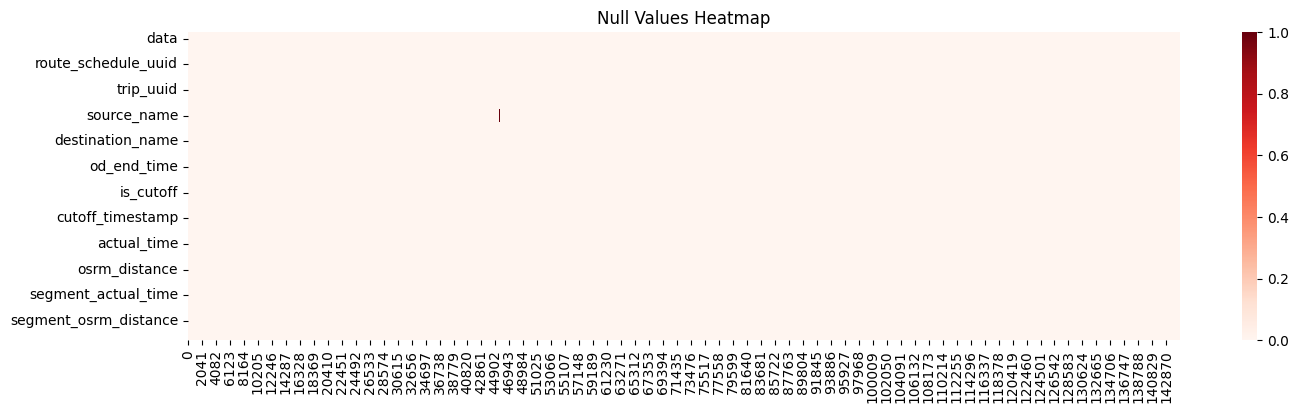

In [ ]:
# Null value heatmap:
plt.figure(figsize = (16,4))
sns.heatmap(df.isnull().T, cmap='Reds')
plt.title('Null Values Heatmap')
plt.show()

**🔍OBSERVATION🔎**
- The column **source_name** has **0.2%** and **destination_name** has **0.18%** missing values which is less than 0.5%.

- Since the **dataset is large and the proportion of missing values is small**, we can **drop the rows** which has missing values.

In [ ]:
# Drop rows with any missing values
df = df.dropna()

In [ ]:
# Dropping unknown columns
unknown_columns = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns=unknown_columns)

In [ ]:
# Check for dropped unknown columns
df.sample()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
83839,training,2018-09-19 01:08:55.493811,thanos::sroute:67c77992-49e3-4594-9a75-9861ef0...,FTL,trip-153731933549351943,IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),IND131028AAB,Sonipat_Kundli_H (Haryana),2018-09-19 01:08:55.493811,2018-09-20 12:18:59.643625,2110.0,155.662924,281.0,146.0,201.3483,26.0,16.0,23.8538


In [ ]:
# Check for any remaining missing values
print("Final check for missing values:")
print(df.isnull().sum())

Final check for missing values:
data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64


## <font color="red">**3.2 Changing the datatype of columns🔃**</font>

In [ ]:
# Checking the datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  actual_distance_to_de

In [ ]:
# Number of unique values in each columns:
print("Number of unique values in each columns:")
print("-" * 40)
for elem in df.columns:
  print(f"{elem}: {df[elem].nunique()}")

Number of unique values in each columns:
----------------------------------------
data: 2
trip_creation_time: 14787
route_schedule_uuid: 1497
route_type: 2
trip_uuid: 14787
source_center: 1496
source_name: 1496
destination_center: 1466
destination_name: 1466
od_start_time: 26223
od_end_time: 26223
start_scan_to_end_scan: 1914
actual_distance_to_destination: 143965
actual_time: 3182
osrm_time: 1531
osrm_distance: 137544
segment_actual_time: 746
segment_osrm_time: 214
segment_osrm_distance: 113497


In [ ]:
# Convert 'data' and 'route_type' columns from object to category since there are only 2 unique values
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

# Convert columns to datetime
datetime_columns = ["trip_creation_time", "od_start_time", "od_end_time"]
df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime)

In [ ]:
# Display the data types after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  category      
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  category      
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetime64[n

## <font color="red">**3.3 Analyze structure & characteristics of the dataset🕵**</font>

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [ ]:
# Basic statistical summary
df.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,144316,2018-09-22 13:05:09.454117120,2018-09-12 00:00:16.535741,2018-09-17 02:46:11.004421120,2018-09-22 03:36:19.186585088,2018-09-27 17:53:19.027942912,2018-10-03 23:59:42.701692,NaN
od_start_time,144316,2018-09-22 17:32:42.435769344,2018-09-12 00:00:16.535741,2018-09-17 07:37:35.014584832,2018-09-22 07:35:23.038482944,2018-09-27 22:01:30.861209088,2018-10-06 04:27:23.392375,NaN
od_end_time,144316,2018-09-23 09:36:54.057172224,2018-09-12 00:50:10.814399,2018-09-18 01:29:56.978912,2018-09-23 02:49:00.936600064,2018-09-28 12:13:41.675546112,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,144316.0,963.697698,20.0,161.0,451.0,1645.0,7898.0,1038.082976
actual_distance_to_destination,144316.0,234.708498,9.000045,23.352027,66.135322,286.919294,1927.447705,345.480571
actual_time,144316.0,417.996237,9.0,51.0,132.0,516.0,4532.0,598.940065
osrm_time,144316.0,214.437055,6.0,27.0,64.0,259.0,1686.0,308.448543
osrm_distance,144316.0,285.549785,9.0082,29.89625,78.6244,346.3054,2326.1991,421.717826
segment_actual_time,144316.0,36.175379,-244.0,20.0,28.0,40.0,3051.0,53.524298
segment_osrm_time,144316.0,18.495697,0.0,11.0,17.0,22.0,1611.0,14.774008


In [ ]:
df.describe(include = "object").T

,count,unique,top,freq
route_schedule_uuid,144316,1497,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
trip_uuid,144316,14787,trip-153837029526866991,101
source_center,144316,1496,IND000000ACB,23267
source_name,144316,1496,Gurgaon_Bilaspur_HB (Haryana),23267
destination_center,144316,1466,IND000000ACB,15192
destination_name,144316,1466,Gurgaon_Bilaspur_HB (Haryana),15192


In [ ]:
# Value couts for categorical columns
categorical_cols = df.select_dtypes(include=['category']).columns
for elem in categorical_cols:
  print(f"Column Name: {elem}")
  print(df[elem].value_counts())
  print("_" * 50)
  print()

Column Name: data
data
training    104632
test         39684
Name: count, dtype: int64
__________________________________________________

Column Name: route_type
route_type
FTL        99132
Carting    45184
Name: count, dtype: int64
__________________________________________________



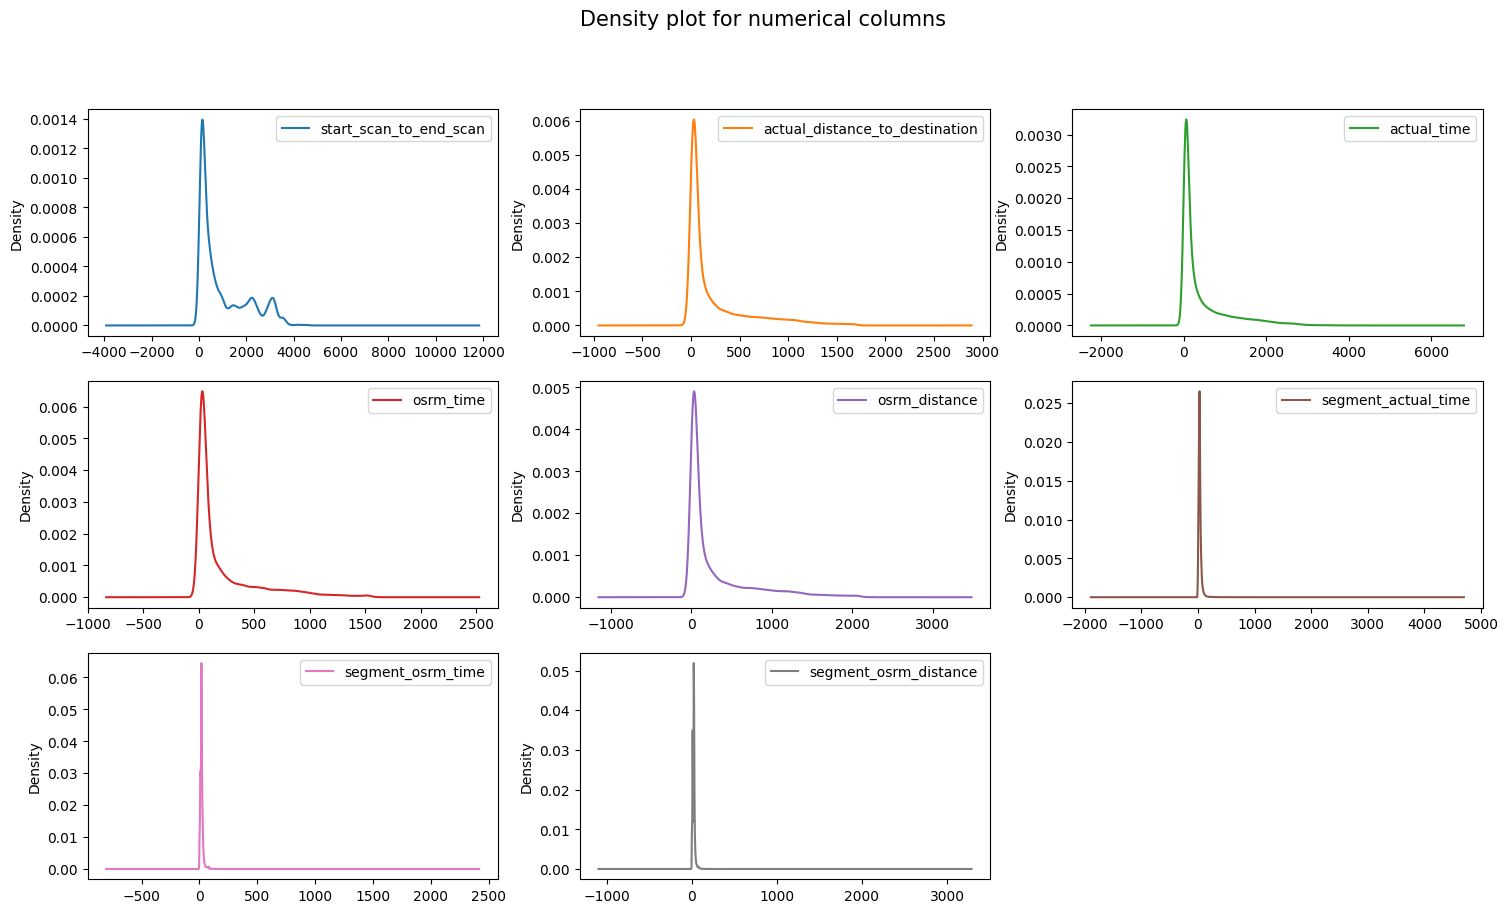

In [ ]:
# Density plot for numerical columns:
numerical_df = df.select_dtypes(include=['float64'])

plt.rcParams["figure.figsize"] = [18,10]
numerical_df.plot(kind="density", subplots = True, layout = (3,3), sharex = False)
plt.suptitle("Density plot for numerical columns", fontsize = 15)
plt.show()

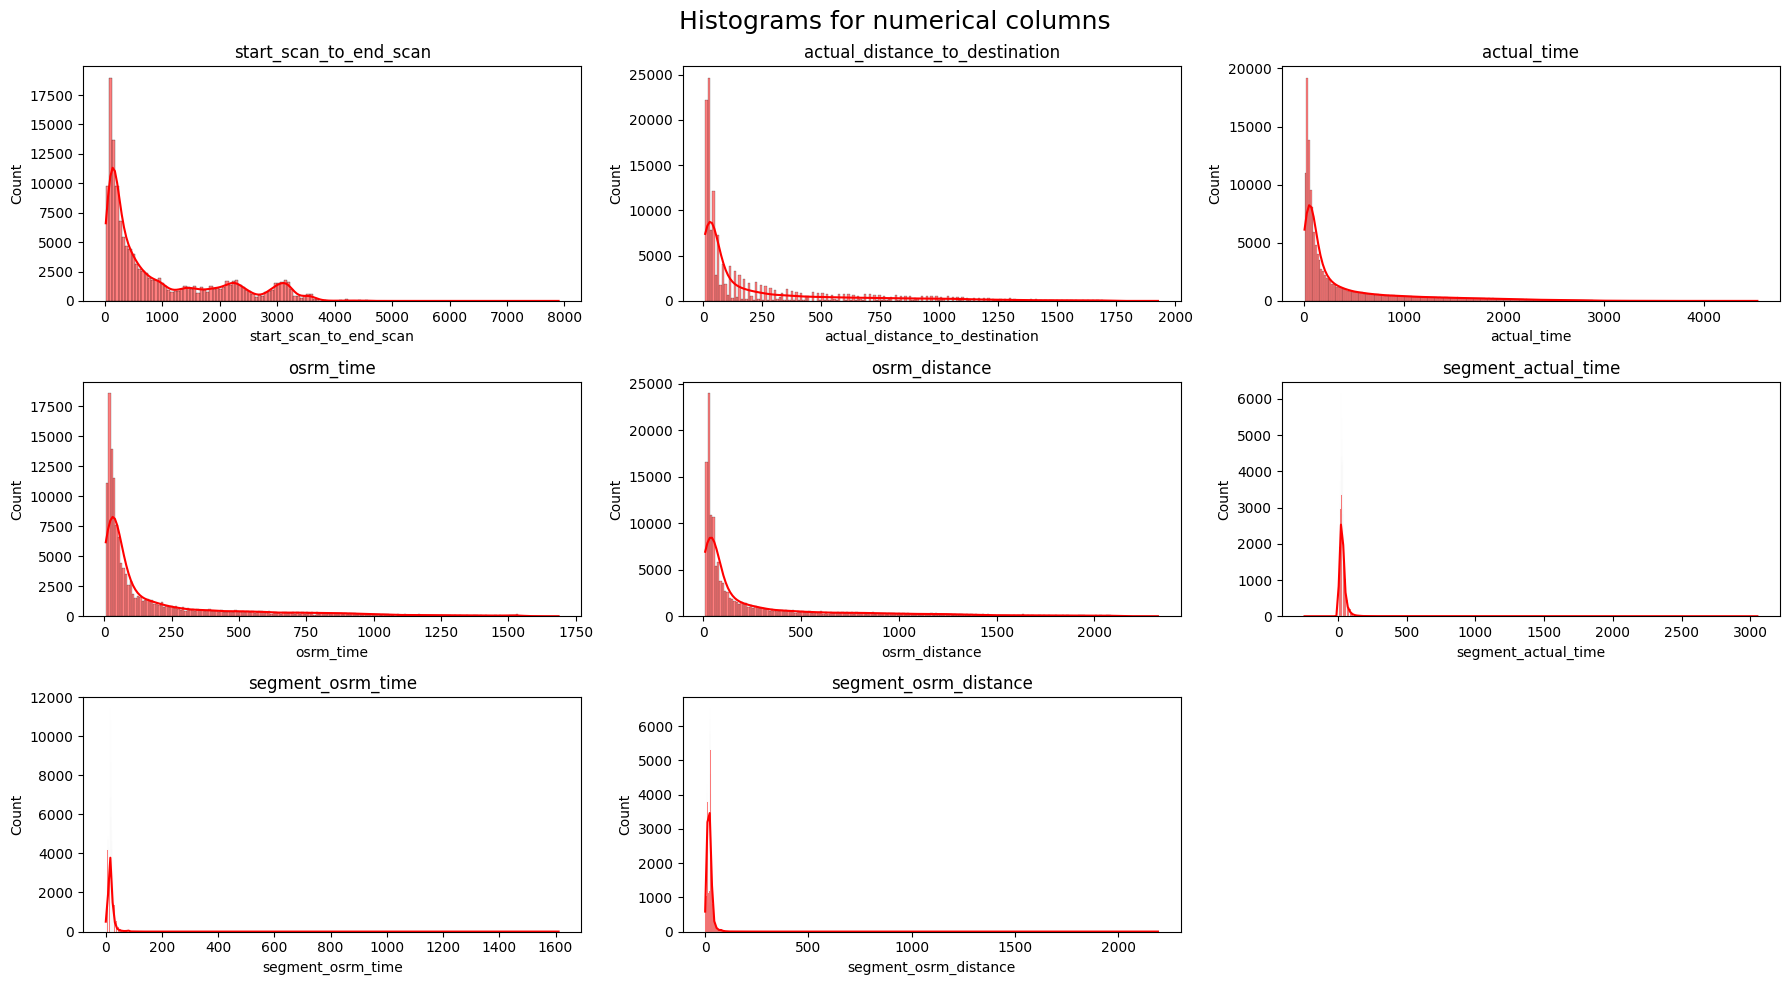

In [ ]:
# Histograms for numerical columns
numerical_cols = numerical_df.columns

plt.figure(figsize=(18,10))
for i, elem in enumerate(numerical_cols):
  plt.subplot(3,3,i+1)
  sns.histplot(df[elem], kde=True, color='red')
  plt.title(elem)
plt.suptitle("Histograms for numerical columns", fontsize = 18)
plt.tight_layout()
plt.show()

In [ ]:
# Skewness Coefficient:
numerical_df.skew().round(4)

start_scan_to_end_scan             1.1053
actual_distance_to_destination     1.9852
actual_time                        2.0624
osrm_time                          2.0392
osrm_distance                      2.0423
segment_actual_time               16.8204
segment_osrm_time                 19.7057
segment_osrm_distance             26.6432
dtype: float64

In [ ]:
# kurtosis co-efficient:
numerical_df.kurt().round(4)

start_scan_to_end_scan              -0.0637
actual_distance_to_destination       3.3708
actual_time                          3.9353
osrm_time                            3.7278
osrm_distance                        3.7065
segment_actual_time                495.2758
segment_osrm_time                 1450.7757
segment_osrm_distance             2323.0754
dtype: float64

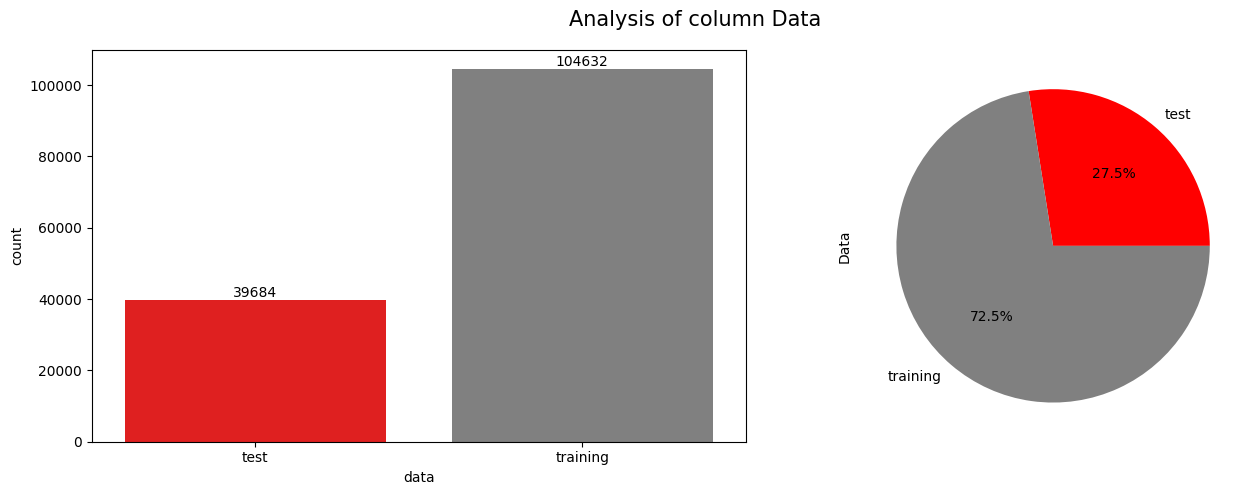

In [ ]:
# Analysis of column Data
red_palette = ['#FF0000', '#808080']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
label = sns.countplot(data = df, x='data', hue = 'data', palette = red_palette)
for i in label.containers:
    label.bar_label(i)

plt.subplot(1, 2, 2)
labels = df.groupby("data")["data"].count().index.categories
values = df.groupby("data")["data"].count().values
plt.pie(values, labels = labels, autopct = "%1.1f%%", colors = red_palette)

plt.ylabel("Data")
plt.suptitle("Analysis of column Data", fontsize = 15)
plt.tight_layout()
plt.show()

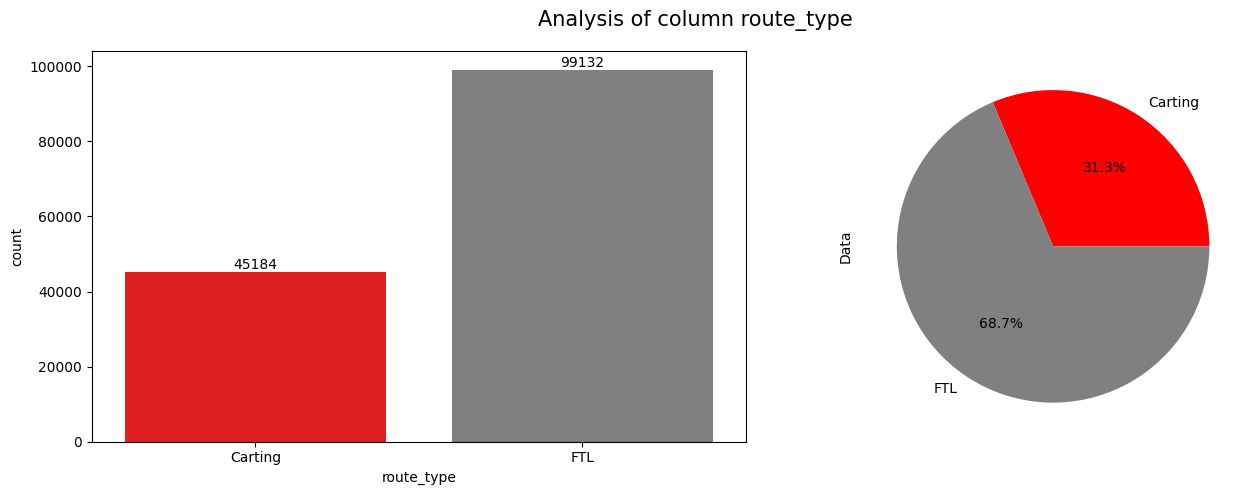

In [ ]:
# Analysis of column route_type
red_palette = ['#FF0000', '#808080']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
label = sns.countplot(data = df, x='route_type', hue = 'route_type', palette = red_palette)
for i in label.containers:
    label.bar_label(i)

plt.subplot(1, 2, 2)
labels = df.groupby("route_type")["route_type"].count().index.categories
values = df.groupby("route_type")["route_type"].count().values
plt.pie(values, labels = labels, autopct = "%1.1f%%", colors = red_palette)

plt.ylabel("Data")
plt.suptitle("Analysis of column route_type", fontsize = 15)
plt.tight_layout()
plt.show()

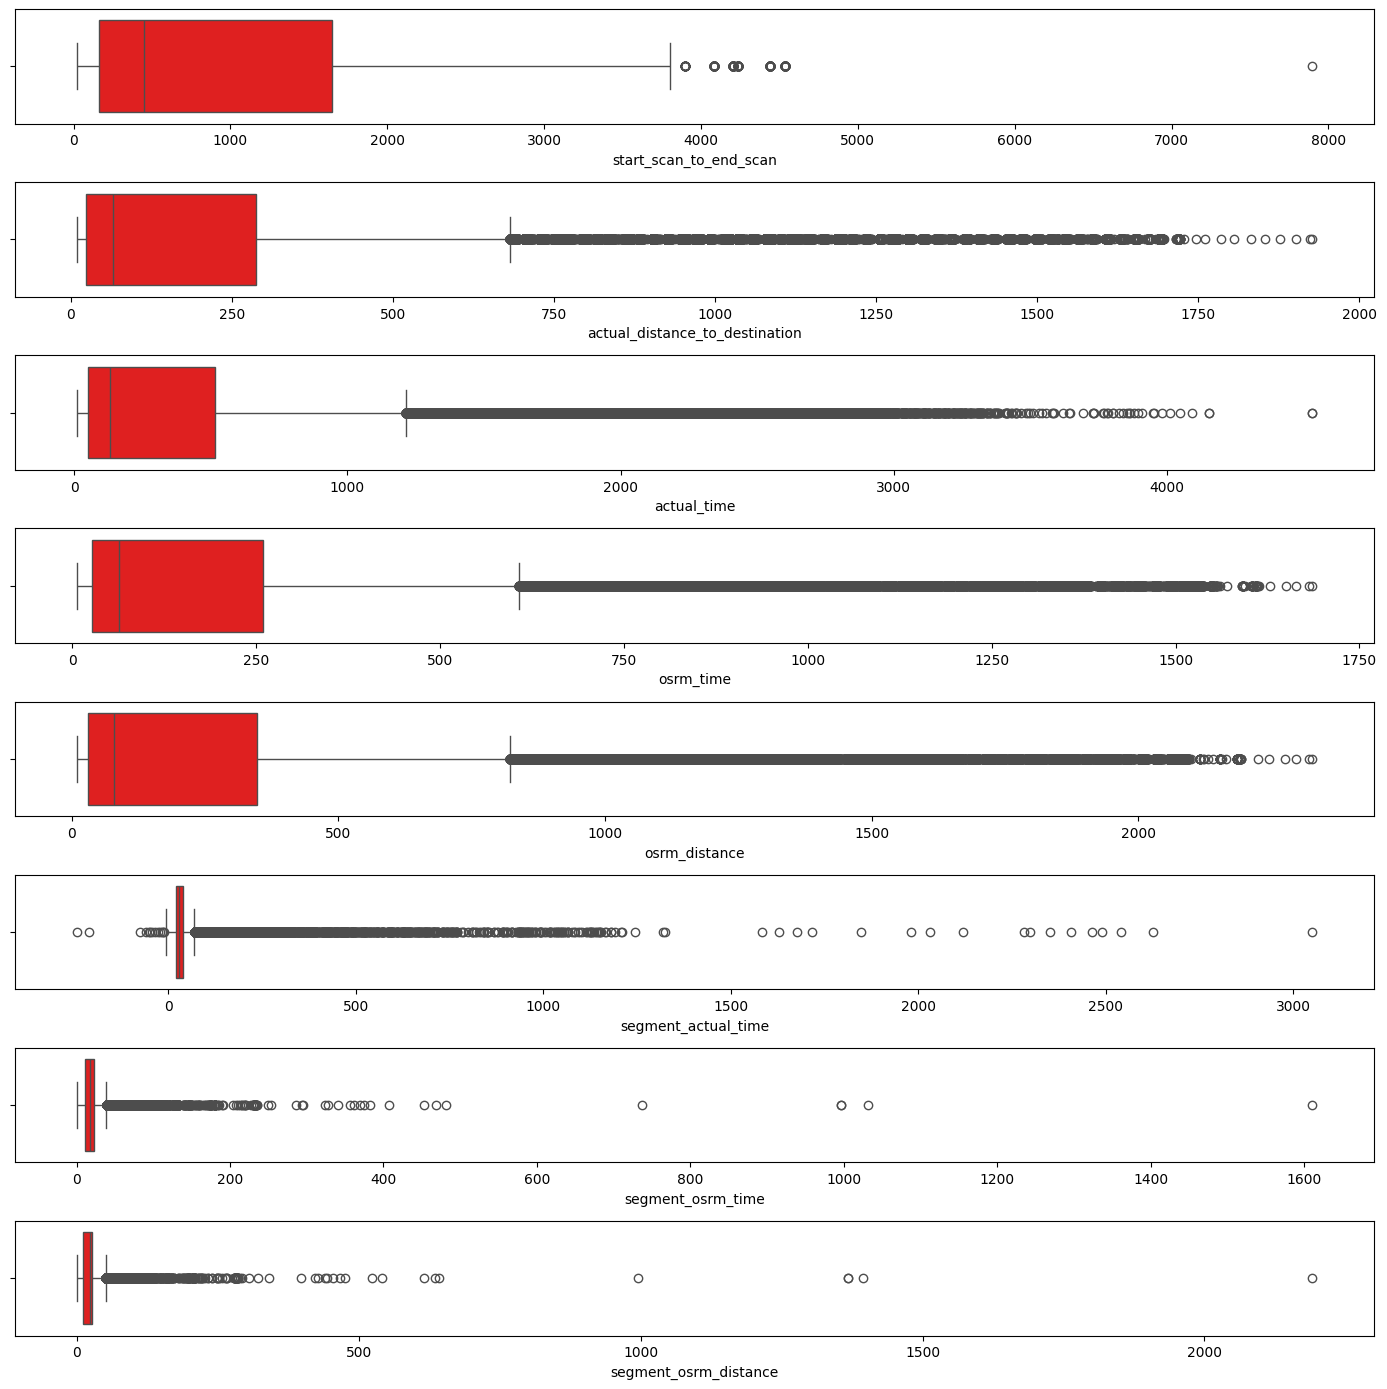

In [ ]:
# Box plots for numerical columns
red_palette = ['#FF0000']
plt.figure(figsize=(14, 14))
for i, col in enumerate(numerical_cols):
    plt.subplot(8, 1, i+1)
    sns.boxplot(df[col], orient="h",palette = red_palette)
    #plt.title(col)
plt.tight_layout()
plt.show()

# **4. Merging the rows and aggregation🔰**  

Since delivery details of one package is divided into several rows (think of it as
connecting flights to reach a particular destination).
Now think about…

- How should we treat their fields if we combine these rows?
- What aggregation would make sense if we merge?
- What would happen to the numeric fields if we merge the rows?

## <font color="red">**4.1 Grouping by segment**</font>

In [ ]:
# Creating a unique identifier for each segment of a trip by column concatenation
df["segment_key"] = df["trip_uuid"] + "+" + df["source_center"] + "+" + df["destination_center"]

segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
for col in segment_cols:
  df[col + "_sum"] = df.groupby("segment_key")[col].cumsum()

df[['segment_key', 'segment_actual_time', 'segment_actual_time_sum','segment_osrm_distance', 'segment_osrm_distance_sum','segment_osrm_time', 'segment_osrm_time_sum']]

,segment_key,segment_actual_time,segment_actual_time_sum,segment_osrm_distance,segment_osrm_distance_sum,segment_osrm_time,segment_osrm_time_sum
0,trip-153741093647649320+IND388121AAA+IND388620AAB,14.0,14.0,11.9653,11.9653,11.0,11.0
1,trip-153741093647649320+IND388121AAA+IND388620AAB,10.0,24.0,9.7590,21.7243,9.0,20.0
2,trip-153741093647649320+IND388121AAA+IND388620AAB,16.0,40.0,10.8152,32.5395,7.0,27.0
3,trip-153741093647649320+IND388121AAA+IND388620AAB,21.0,61.0,13.0224,45.5619,12.0,39.0
4,trip-153741093647649320+IND388121AAA+IND388620AAB,6.0,67.0,3.9153,49.4772,5.0,44.0
...,...,...,...,...,...,...,...
144862,trip-153746066843555182+IND131028AAB+IND000000ACB,12.0,92.0,8.1858,65.3487,12.0,94.0
144863,trip-153746066843555182+IND131028AAB+IND000000ACB,26.0,118.0,17.3725,82.7212,21.0,115.0
144864,trip-153746066843555182+IND131028AAB+IND000000ACB,20.0,138.0,20.7053,103.4265,34.0,149.0
144865,trip-153746066843555182+IND131028AAB+IND000000ACB,17.0,155.0,18.8885,122.3150,27.0,176.0


## <font color="red">**4.2 Aggregating at segment level**</font>

In [ ]:
# Creating a dictionary for aggregation at segment level

segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
}

# Grouping by segment_key and aggregating
segment = df.groupby('segment_key').agg(segment_dict).reset_index()
segment = segment.sort_values(by=['segment_key','od_end_time'])
segment

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431
26218,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869
26219,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184
26220,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303,233.0,42.0,52.5303


# **5. Feature Engineering 🛠**

## <font color="red">**5.1 Extract features from the below fields**</font>

In [ ]:
new_df = segment.copy()

**Creating new feature od_time_diff and od_time_diff_hour**

In [ ]:
# 1. Creating new feature od_time_diff and od_time_diff_hour
# Calculate the time difference
new_df['od_time_diff'] = new_df['od_end_time'] - new_df['od_start_time']

# Convert the time difference to hours
new_df['od_time_diff_hour'] = new_df['od_time_diff'].dt.total_seconds()/ 3600
new_df

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff,od_time_diff_hour
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205,0 days 21:00:36.265275,21.010074
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528,0 days 16:39:30.322728,16.658423
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995,0 days 00:58:49.943264,0.980540
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899,0 days 02:02:46.769161,2.046325
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408,0 days 13:54:38.335721,13.910649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,...,41.0,42.5213,49.0,42.0,42.1431,49.0,42.0,42.1431,0 days 01:02:06.911603,1.035253
26218,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,...,48.0,40.6080,89.0,77.0,78.5869,89.0,77.0,78.5869,0 days 01:31:05.267810,1.518130
26219,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,...,14.0,16.0185,29.0,14.0,16.0184,29.0,14.0,16.0184,0 days 00:44:10.464194,0.736240
26220,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,...,42.0,52.5303,233.0,42.0,52.5303,233.0,42.0,52.5303,0 days 04:47:28.440393,4.791233


In [ ]:
# Why .dt.total_seconds()/ 3600, Why not .dt.hour?
# Precision: .dt.total_seconds()/ 3600 is precise and includes fractional hours, providing a detailed view of the time difference.
# Example: If the time difference is 2 hours and 30 minutes, .dt.hour will give you 2, which is not accurate for total hours.

**Lets explore destination name and source name features**

In [ ]:
# 2. Lets explore destination name and source name features
# Checking the destination_name column
new_df["destination_name"].value_counts()

destination_name
Gurgaon_Bilaspur_HB (Haryana)                928
Bangalore_Nelmngla_H (Karnataka)             665
Bhiwandi_Mankoli_HB (Maharashtra)            583
Chandigarh_Mehmdpur_H (Punjab)               431
Hyderabad_Shamshbd_H (Telangana)             405
                                            ... 
PaliBirsighpr_CtyLgDPP_D (Madhya Pradesh)      1
Gurgaon_SohnaRd_D (Haryana)                    1
Kasaragod_Nullipad_D (Kerala)                  1
Agra_Idgah_L (Uttar Pradesh)                   1
Jaipur_Central_D_1 (Rajasthan)                 1
Name: count, Length: 1466, dtype: int64

**🔍OBSERVATION🔎**

- The destination_name is in the format of **City_Place_Code (State)**

In [ ]:
# Checking the source_name column
new_df["source_name"].value_counts()

source_name
Gurgaon_Bilaspur_HB (Haryana)          1052
Bhiwandi_Mankoli_HB (Maharashtra)       821
Bangalore_Nelmngla_H (Karnataka)        768
Bengaluru_Bomsndra_HB (Karnataka)       466
Pune_Tathawde_H (Maharashtra)           403
                                       ... 
Barbil_PunjbiPd_D (Orissa)                1
Chalisgaon_BhadgDPP_D (Maharashtra)       1
Mumbai Mahim (Maharashtra)                1
Delhi_Shahdara (Delhi)                    1
Kapadvanj_Busstand_D (Gujarat)            1
Name: count, Length: 1496, dtype: int64

**🔍OBSERVATION🔎**

- The source_name is in the format of **City_Place_Code (State)**

In [ ]:
# Regex pattern to capture different formats
pattern = r'^(?P<city>[^\s_]+)(?:[ _](?P<place>[^_]+?))?(?:[ _](?P<code>[^ ]+))? \((?P<state>[^)]+)\)$'

# Extract components for source_name
new_df[['source_city', 'source_place', 'source_code', 'source_state']] = new_df['source_name'].str.extract(pattern)

# Extract components for destination_name
new_df[['destination_city', 'destination_place', 'destination_code', 'destination_state']] = new_df['destination_name'].str.extract(pattern)

In [ ]:
# How many percentage of data is missing in each column
missing_value = pd.DataFrame({'Missing Value': new_df.isna().sum(), 'Percentage': ((new_df.isna().sum() / len(new_df))*100).round(2)})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
source_code,2713,10.35
destination_code,2698,10.29
destination_place,446,1.70
source_place,343,1.31
segment_key,0,0.00
trip_uuid,0,0.00
destination_city,0,0.00
source_state,0,0.00
source_city,0,0.00
od_time_diff_hour,0,0.00


**🔍OBSERVATION🔎**

Lets drop the columns source_code and destination_code since we have all the other infos like City, place and State for source and destination.

In [ ]:
# Droping the columns source_code and destination_code
new_df.drop(columns=['source_code','destination_code'], inplace=True)

In [ ]:
new_df[new_df.isna().any(axis=1)][['source_name', 'source_city', 'source_place', 'source_state', 'destination_name','destination_city', 'destination_place', 'destination_state']]

,source_name,source_city,source_place,source_state,destination_name,destination_city,destination_place,destination_state
7,Bellary_Dc (Karnataka),Bellary,Dc,Karnataka,Hospet (Karnataka),Hospet,NaN,Karnataka
9,Hospet (Karnataka),Hospet,NaN,Karnataka,Sandur_WrdN1DPP_D (Karnataka),Sandur,WrdN1DPP,Karnataka
19,FBD_Balabhgarh_DPC (Haryana),FBD,Balabhgarh,Haryana,Faridabad (Haryana),Faridabad,NaN,Haryana
33,Delhi_Nangli_IP (Delhi),Delhi,Nangli,Delhi,Janakpuri (Delhi),Janakpuri,NaN,Delhi
80,FBD_Balabhgarh_DPC (Haryana),FBD,Balabhgarh,Haryana,Palwal (Haryana),Palwal,NaN,Haryana
...,...,...,...,...,...,...,...,...
26118,Janakpuri (Delhi),Janakpuri,NaN,Delhi,Delhi_Nangli_IP (Delhi),Delhi,Nangli,Delhi
26153,Jabalpur_Adhartal_IP (Madhya Pradesh),Jabalpur,Adhartal,Madhya Pradesh,Jabalpur (Madhya Pradesh),Jabalpur,NaN,Madhya Pradesh
26180,Muzaffrpur_Bbganj_I (Bihar),Muzaffrpur,Bbganj,Bihar,Darbhanga (Bihar),Darbhanga,NaN,Bihar
26181,Darbhanga (Bihar),Darbhanga,NaN,Bihar,Benipur_Javahar_D (Bihar),Benipur,Javahar,Bihar


In [ ]:
# Fill NaN values with 'Unknown' for better handling
new_df['source_place'].fillna('Unknown', inplace=True)
new_df['destination_place'].fillna('Unknown', inplace=True)

In [ ]:
# Replacing the unknown values with corresponding city names
new_df['source_place'] = new_df.apply(lambda x: x['source_place'] if x['source_place'] != 'Unknown' else x['source_city'], axis = 1)
new_df['destination_place'] = new_df.apply(lambda x: x['destination_place'] if x['destination_place'] != 'Unknown' else x['destination_city'], axis = 1)

In [ ]:
# How many percentage of data is missing in each column
missing_value = pd.DataFrame({'Missing Value': new_df.isna().sum(), 'Percentage': ((new_df.isna().sum() / len(new_df))*100).round(2)})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
segment_key,0,0.0
trip_uuid,0,0.0
destination_place,0,0.0
destination_city,0,0.0
source_state,0,0.0
source_place,0,0.0
source_city,0,0.0
od_time_diff_hour,0,0.0
od_time_diff,0,0.0
segment_osrm_distance_sum,0,0.0


**Lets explore trip creatime feature**

In [ ]:
# 3. Extract features
new_df['trip_creation_year'] = new_df['trip_creation_time'].dt.year
new_df['trip_creation_month'] = new_df['trip_creation_time'].dt.month
new_df['trip_creation_day'] = new_df['trip_creation_time'].dt.day
new_df['trip_creation_hour'] = new_df['trip_creation_time'].dt.hour
new_df['trip_creation_day_of_week'] = new_df['trip_creation_time'].dt.dayofweek  # Monday=0, Sunday=6
new_df['trip_creation_week_of_year'] = new_df['trip_creation_time'].dt.isocalendar().week
new_df['trip_creation_quarter'] = new_df['trip_creation_time'].dt.quarter

In [ ]:
new_df.head()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_city,destination_place,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_day_of_week,trip_creation_week_of_year,trip_creation_quarter
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,Gurgaon,Bilaspur,Haryana,2018,9,12,0,2,37,3
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,Kanpur,Central,Uttar Pradesh,2018,9,12,0,2,37,3
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,Chikblapur,ShntiSgr,Karnataka,2018,9,12,0,2,37,3
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,Doddablpur,ChikaDPP,Karnataka,2018,9,12,0,2,37,3
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,Chandigarh,Mehmdpur,Punjab,2018,9,12,0,2,37,3


## <font color="red">**5.2 Segment level Analysis📊**</font>



### **Q1) What is the Segment count distributions among each Source states?**

In [ ]:
# Function for Counts:
red_palette = ['#FF0000', '#A9A9A9', '#800000', '#D3D3D3', '#B22222', '#696969', '#FF6347', '#808080', '#CD5C5C', '#DCDCDC']

# Create a function to plot counts
def plot_counts(column, title):
    counts = new_df[column].value_counts().to_frame().reset_index()
    counts.columns = [column, 'count']
    ax = sns.barplot(x='count', y=column, data=counts, palette=red_palette)

    for index, value in enumerate(counts['count']):
      ax.text(value, index, f'{value}', va='center')

    plt.title(title)
    plt.show()

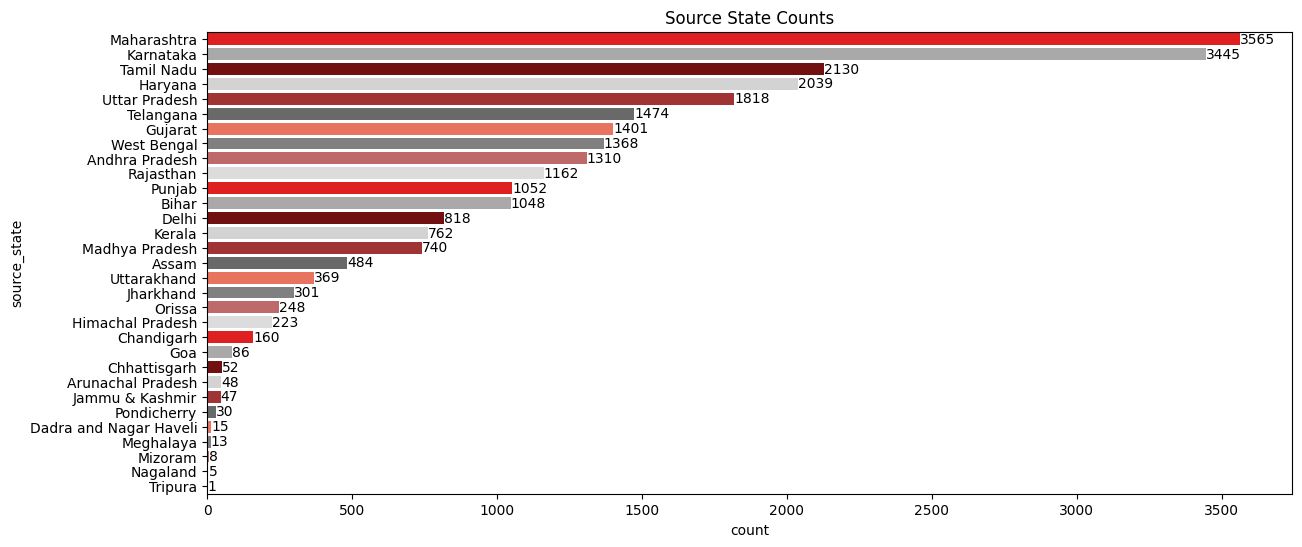

In [ ]:
# Create a horizontal bar for Source State Counts:
plt.figure(figsize=(14, 6))
plot_counts('source_state', 'Source State Counts')

**🔍OBSERVATION🔎**
- Source states with higher activity in terms of logistics operations are **Maharashtra, Karnataka, Tamil Nadu, Haryana, Uttar Pradesh, Telangana etc**

- Source states with underutilization of logistics operations are **Tripura, Nagaland, Mizoram, Meghalaya, Dadra and Nagar Haveli etc**

### **Q2) What is the Segment count distributions among each Destination states?**

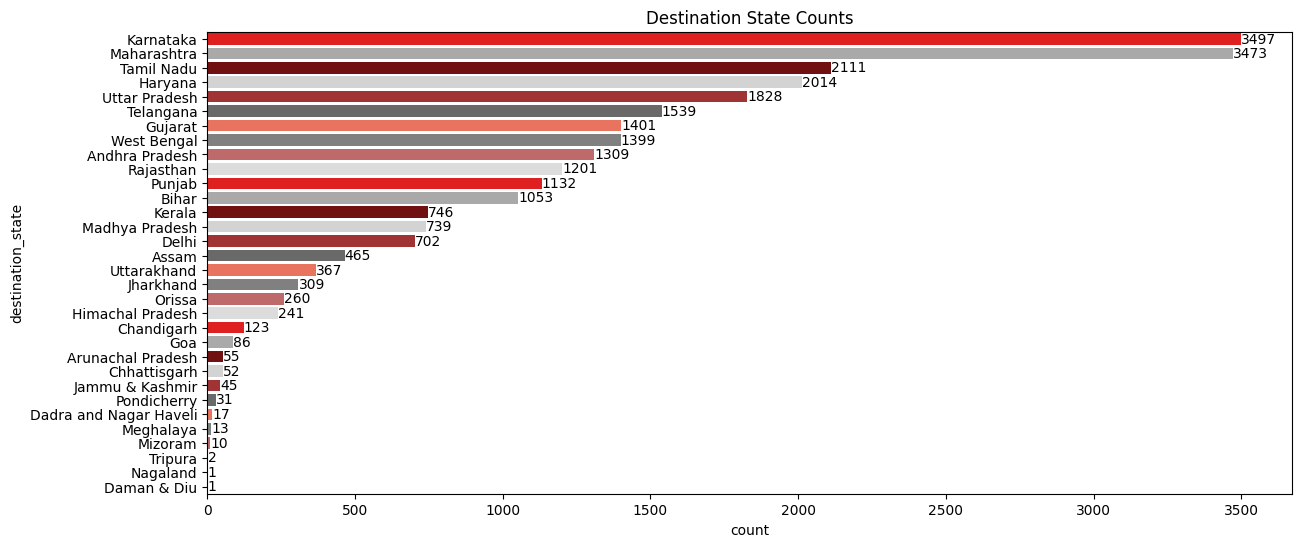

In [ ]:
# Create a horizontal bar for Destination State Counts:
plt.figure(figsize=(14, 6))
plot_counts('destination_state', 'Destination State Counts')

**🔍OBSERVATION🔎**
- Desination states with higher activity in terms of logistics operations are **Karnataka, Maharashtra , Tamil Nadu, Haryana, Uttar Pradesh, Telangana etc**

- Desination states with underutilization of logistics operations are **Daman & Diu, Nagaland, Tripura, Mizoram, Meghalaya, Dadra and Nagar Haveli etc**

### **Q3) What are the top 10 Source and Destination States and Cities?**

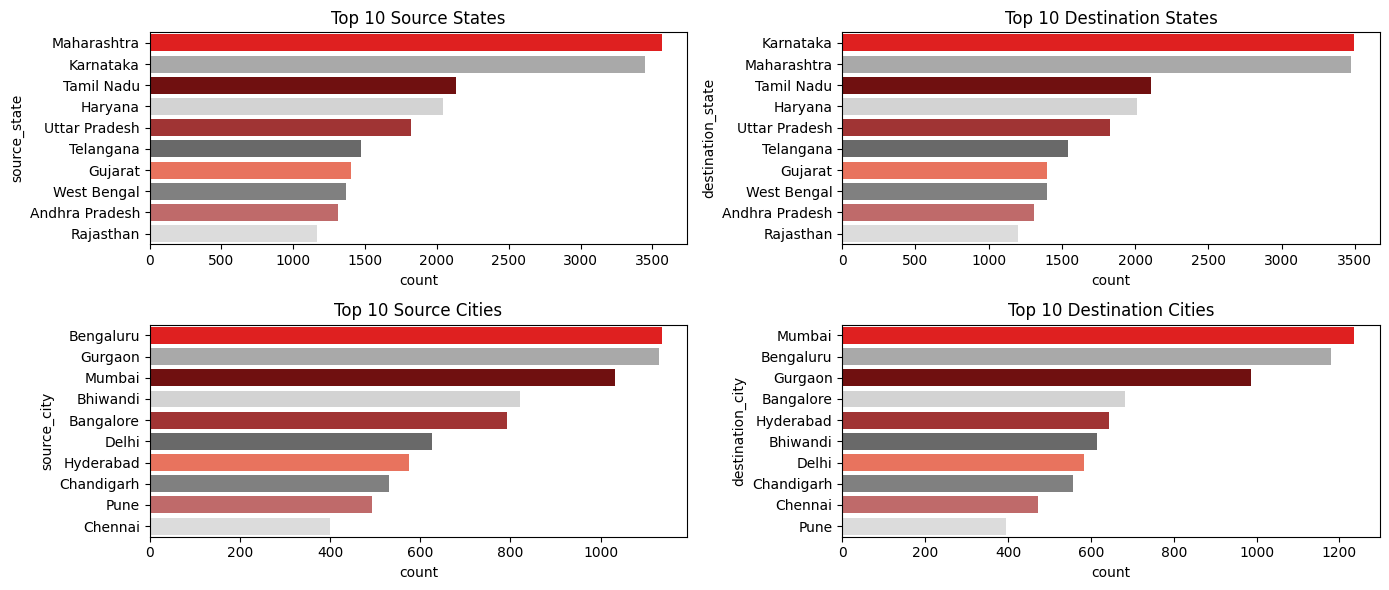

In [ ]:
# Top 10 Source, Destination states and Cities:
red_palette = ['#FF0000', '#A9A9A9', '#800000', '#D3D3D3', '#B22222', '#696969', '#FF6347', '#808080', '#CD5C5C', '#DCDCDC']

# Create a function to plot top 10 counts
def plot_top_counts(ax, column, title):
    counts = new_df[column].value_counts().to_frame().reset_index()[:10]
    counts.columns = [column, 'count']
    sns.barplot(x='count', y=column, data=counts, palette=red_palette, ax=ax)
    ax.set_title(title)

# Create subplots with a 2x2 matrix
fig, axs = plt.subplots(2, 2, figsize=(14, 6))

# Plot top 10 source_state
plot_top_counts(axs[0, 0], 'source_state', 'Top 10 Source States')

# Plot top 10 destination_state
plot_top_counts(axs[0, 1], 'destination_state', 'Top 10 Destination States')

# Plot top 10 source_city
plot_top_counts(axs[1, 0], 'source_city', 'Top 10 Source Cities')

# Plot top 10 destination_city
plot_top_counts(axs[1, 1], 'destination_city', 'Top 10 Destination Cities')

# Adjust layout
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

- Source cities with higher activity in terms of logistics operations are **Bangalure, Gurgaon, Mumbai, Bhiwandi Delhi, etc**

- Destination cities with higher activity in terms of logistics operations are **Mumbai, Bengaluru, Gurgoan, Hyderabad Bhiwandi etc**

### **Q4) What are the top 10 Busiest corridor?**

In [ ]:
# Create a corridor column combining source name and destination name:
new_df['corridor'] = new_df['source_name'] +' --> '+ new_df['destination_name']

In [ ]:
# Top 10 Source, Destination states and Cities:
red_palette = ['#FF0000', '#A9A9A9', '#800000', '#D3D3D3', '#B22222', '#696969', '#FF6347', '#808080', '#CD5C5C', '#DCDCDC']

# Create a function to plot top 10 counts
def plot_top_counts(column, title):
    counts = new_df[column].value_counts().to_frame().reset_index()[:10]
    counts.columns = [column, 'count']
    ax = sns.barplot(x='count', y=column, data=counts, palette=red_palette)

    for index, value in enumerate(counts['count']):
      ax.text(value, index, f'{value}', va='center')

    plt.title(title)
    plt.show()

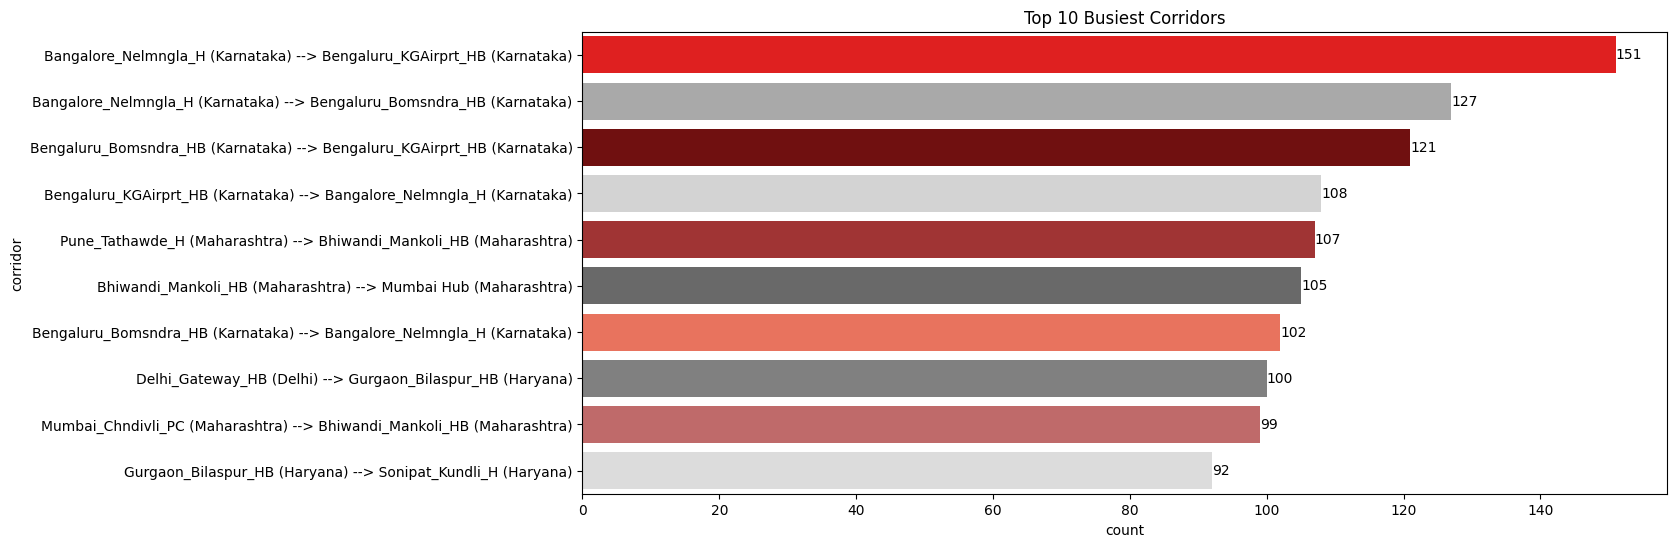

In [ ]:
# Create a horizontal bar for Top 10 Busiest Corridors:
plt.figure(figsize=(14, 6))
plot_top_counts('corridor', 'Top 10 Busiest Corridors')

**🔍OBSERVATION🔎**
- Top Corridors experience significantly higher traffic compared to others are **Bangalore_Nelmngla_H (Karnataka) --> Bengaluru_KGAirprt_HB (Karnataka), Bangalore_Nelmngla_H (Karnataka) --> Bengaluru_Bomsndra_HB (Karnataka), Bengaluru_Bomsndra_HB (Karnataka) --> Bengaluru_KGAirprt_HB (Karnataka), Bengaluru_KGAirprt_HB (Karnataka) --> Bangalore_Nelmngla_H (Karnataka) and Pune_Tathawde_H (Maharashtra) --> Bhiwandi_Mankoli_HB (Maharashtra)** etc

# **6. In-depth analysis🔽**

## <font color="red">**6.1 Grouping and Aggregating at Trip-level**</font>

In [ ]:
depth_df = new_df.copy()

In [ ]:
depth_df

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_place,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour,trip_creation_day_of_week,trip_creation_week_of_year,trip_creation_quarter,corridor
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,...,Bilaspur,Haryana,2018,9,12,0,2,37,3,Kanpur_Central_H_6 (Uttar Pradesh) --> Gurgaon...
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,...,Central,Uttar Pradesh,2018,9,12,0,2,37,3,Bhopal_Trnsport_H (Madhya Pradesh) --> Kanpur_...
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,...,ShntiSgr,Karnataka,2018,9,12,0,2,37,3,Doddablpur_ChikaDPP_D (Karnataka) --> Chikblap...
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,...,ChikaDPP,Karnataka,2018,9,12,0,2,37,3,Tumkur_Veersagr_I (Karnataka) --> Doddablpur_C...
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,...,Mehmdpur,Punjab,2018,9,12,0,2,37,3,Gurgaon_Bilaspur_HB (Haryana) --> Chandigarh_M...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069+IND628204AAA+IND627657AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,...,UdnkdiRD,Tamil Nadu,2018,10,3,23,2,40,4,Tirchchndr_Shnmgprm_D (Tamil Nadu) --> Thisaya...
26218,trip-153861115439069069+IND628613AAA+IND627005AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,...,VdkkuSrt,Tamil Nadu,2018,10,3,23,2,40,4,Peikulam_SriVnktpm_D (Tamil Nadu) --> Tirunelv...
26219,trip-153861115439069069+IND628801AAA+IND628204AAA,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,...,Shnmgprm,Tamil Nadu,2018,10,3,23,2,40,4,Eral_Busstand_D (Tamil Nadu) --> Tirchchndr_Sh...
26220,trip-153861118270144424+IND583119AAA+IND583101AAA,trip-153861118270144424,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,...,Dc,Karnataka,2018,10,3,23,2,40,4,Sandur_WrdN1DPP_D (Karnataka) --> Bellary_Dc (...


In [ ]:
# 1. Grouping and Aggregating at Trip-level
create_trip_dict={
   'data': 'first',
   'route_type': 'first',
   'od_start_time': 'first',
   'od_end_time': 'last',
   'od_time_diff_hour': 'sum',
   'trip_creation_time': 'first',
   'trip_creation_year': 'first',
   'trip_creation_month': 'first',
   'trip_creation_day': 'first',
   'trip_creation_hour': 'first',
   'trip_creation_day_of_week': 'first',
   'trip_creation_week_of_year': 'first',
   'trip_creation_quarter': 'first',
   'start_scan_to_end_scan': 'sum',
   'actual_distance_to_destination': 'sum',
   'actual_time': 'sum',
   'osrm_time': 'sum',
   'osrm_distance': 'sum',
   'segment_actual_time': 'sum',
   'segment_osrm_time': 'sum',
   'segment_osrm_distance': 'sum',
   'segment_actual_time_sum': 'sum',
   'segment_osrm_time_sum': 'sum',
   'segment_osrm_distance_sum': 'sum',
   'source_name': 'first',
   'source_city': 'first',
   'source_state': 'first',
   'source_place': 'first',
   'destination_name': 'last',
   'destination_city': 'last',
   'destination_state': 'last',
   'destination_place': 'last',
   'corridor': 'first'
   }

trip_df = depth_df.groupby('trip_uuid').agg(create_trip_dict).reset_index()
trip_df

,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,...,segment_osrm_distance_sum,source_name,source_city,source_state,source_place,destination_name,destination_city,destination_state,destination_place,corridor
0,trip-153671041653548748,training,FTL,2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,37.668497,2018-09-12 00:00:16.535741,2018,9,12,...,1320.4733,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur,Uttar Pradesh,Central,Kanpur_Central_H_6 (Uttar Pradesh) --> Gurgaon...
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,3.026865,2018-09-12 00:00:22.886430,2018,9,12,...,84.1894,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,Karnataka,ChikaDPP,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,Karnataka,ChikaDPP,Doddablpur_ChikaDPP_D (Karnataka) --> Chikblap...
2,trip-153671043369099517,training,FTL,2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,65.572709,2018-09-12 00:00:33.691250,2018,9,12,...,2545.2678,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur,Gurgaon_Bilaspur_HB (Haryana),Gurgaon,Haryana,Bilaspur,Gurgaon_Bilaspur_HB (Haryana) --> Chandigarh_M...
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.674916,2018-09-12 00:01:00.113710,2018,9,12,...,19.8766,Mumbai Hub (Maharashtra),Mumbai,Maharashtra,Hub,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,MiraRd,Mumbai Hub (Maharashtra) --> Mumbai_MiraRd_IP ...
4,trip-153671052974046625,training,FTL,2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,11.972484,2018-09-12 00:02:09.740725,2018,9,12,...,146.7919,Bellary_Dc (Karnataka),Bellary,Karnataka,Dc,Sandur_WrdN1DPP_D (Karnataka),Sandur,Karnataka,WrdN1DPP,Bellary_Dc (Karnataka) --> Hospet (Karnataka)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,2018-10-03 23:55:56.258533,2018-10-04 06:41:25.409035,4.300482,2018-10-03 23:55:56.258533,2018,10,3,...,64.8551,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur,Chandigarh_Mehmdpur_H (Punjab),Chandigarh,Punjab,Mehmdpur,Chandigarh_Mehmdpur_H (Punjab) --> Zirakpur_DC...
14783,trip-153861104386292051,test,Carting,2018-10-03 23:57:23.863155,2018-10-04 00:57:59.294434,1.009842,2018-10-03 23:57:23.863155,2018,10,3,...,16.0883,FBD_Balabhgarh_DPC (Haryana),FBD,Haryana,Balabhgarh,Faridabad_Blbgarh_DC (Haryana),Faridabad,Haryana,Blbgarh,FBD_Balabhgarh_DPC (Haryana) --> Faridabad_Blb...
14784,trip-153861106442901555,test,Carting,2018-10-04 02:51:27.075797,2018-10-04 02:51:27.075797,7.035331,2018-10-03 23:57:44.429324,2018,10,3,...,104.8866,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur,Uttar Pradesh,GovndNgr,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur,Uttar Pradesh,GovndNgr,Kanpur_GovndNgr_DC (Uttar Pradesh) --> Kanpur_...
14785,trip-153861115439069069,test,Carting,2018-10-03 23:59:14.390954,2018-10-04 02:29:04.272194,5.808548,2018-10-03 23:59:14.390954,2018,10,3,...,223.5324,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli,Tamil Nadu,VdkkuSrt,Tirchchndr_Shnmgprm_D (Tamil Nadu),Tirchchndr,Tamil Nadu,Shnmgprm,Tirunelveli_VdkkuSrt_I (Tamil Nadu) --> Eral_B...


## <font color="red">**6.2 Trip level Analysis📊**</font>

In [ ]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  category      
 2   route_type                      14787 non-null  category      
 3   od_start_time                   14787 non-null  datetime64[ns]
 4   od_end_time                     14787 non-null  datetime64[ns]
 5   od_time_diff_hour               14787 non-null  float64       
 6   trip_creation_time              14787 non-null  datetime64[ns]
 7   trip_creation_year              14787 non-null  int32         
 8   trip_creation_month             14787 non-null  int32         
 9   trip_creation_day               14787 non-null  int32         
 10  trip_creation_hour              14787 non-null  int32         
 11  tr

In [ ]:
# Stastical summery for numerical columns:
trip_df.describe(include = ["int32","float64"]).T

,count,mean,std,min,25%,50%,75%,max
od_time_diff_hour,14787.0,8.840187,10.978880,0.391024,2.494975,4.661846,10.558962,131.642533
trip_creation_year,14787.0,2018.000000,0.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
trip_creation_month,14787.0,9.120105,0.325096,9.000000,9.000000,9.000000,9.000000,10.000000
trip_creation_day,14787.0,18.375127,7.882198,1.000000,14.000000,19.000000,25.000000,30.000000
trip_creation_hour,14787.0,12.456212,7.987387,0.000000,4.000000,14.000000,20.000000,23.000000
trip_creation_day_of_week,14787.0,2.920944,1.927690,0.000000,1.000000,3.000000,5.000000,6.000000
trip_creation_quarter,14787.0,3.120105,0.325096,3.000000,3.000000,3.000000,3.000000,4.000000
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000


In [ ]:
# Stastical summery for numerical columns:
trip_df.describe(include = ["object","category"]).T

,count,unique,top,freq
trip_uuid,14787,14787,trip-153671041653548748,1
data,14787,2,training,10645
route_type,14787,2,Carting,8906
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
source_city,14787,714,Gurgaon,1128
source_state,14787,29,Maharashtra,2714
source_place,14787,733,Bilaspur,1074
destination_name,14787,1035,Gurgaon_Bilaspur_HB (Haryana),821
destination_city,14787,840,Mumbai,1202
destination_state,14787,31,Maharashtra,2561


In [ ]:
# Creating the trip_numerical_df:
trip_numerical_df = trip_df.select_dtypes(include=['float64'])
trip_numerical_df

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,37.668497,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,1548.0,1008.0,1320.4733
1,3.026865,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,141.0,65.0,84.1894
2,65.572709,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,3308.0,1941.0,2545.2678
3,1.674916,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,59.0,16.0,19.8766
4,11.972484,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...
14782,4.300482,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,82.0,62.0,64.8551
14783,1.009842,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,21.0,11.0,16.0883
14784,7.035331,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,281.0,88.0,104.8866
14785,5.808548,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,258.0,221.0,223.5324


### **Q1) How are trip creation times distributed over the dataset?**

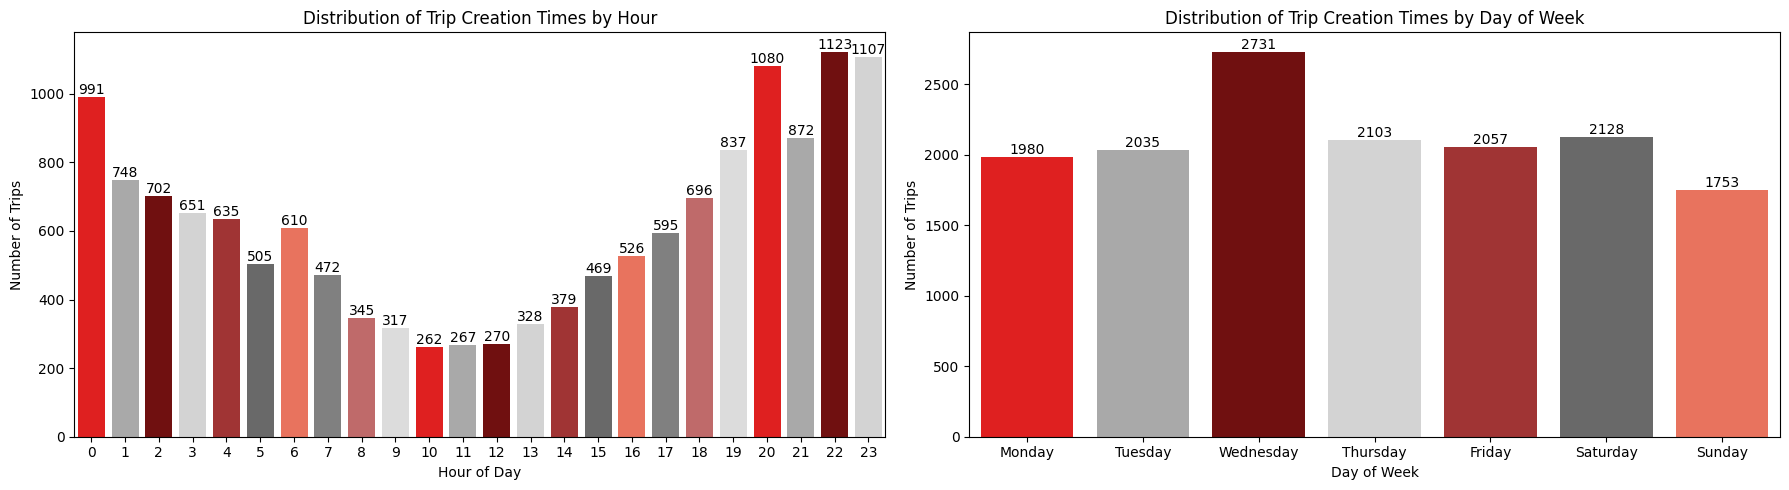

In [ ]:
# Analysis of trip creation times distributed over the dataset
red_palette = ['#FF0000', '#A9A9A9', '#800000', '#D3D3D3', '#B22222', '#696969', '#FF6347', '#808080', '#CD5C5C', '#DCDCDC']

plt.figure(figsize=(18, 5))

# Plot distribution of trip creation times by hour
plt.subplot(1, 2, 1)
label = sns.countplot(x='trip_creation_hour', data = trip_df, palette=red_palette)
for i in label.containers:
    label.bar_label(i)
plt.title('Distribution of Trip Creation Times by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')

# Plot distribution of trip creation times by day of week
plt.subplot(1, 2, 2)
label = sns.countplot(x='trip_creation_day_of_week', data = trip_df, palette=red_palette)
for i in label.containers:
    label.bar_label(i)
# Set x-axis tick labels to represent days of the week
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Trip Creation Times by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')

plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

-  **Trip creation activities among hour of day** are significantly **high from 4 pm to 6 am** and the trip creation activities are significantly **low from 7 am to 3 pm**.
- **Trip creation activities among day of week** are significantly **high on wednesday and low on Sunday**.

### **Q2) What is the contribution and average actual distance to destination for FTL and Carting routes?**

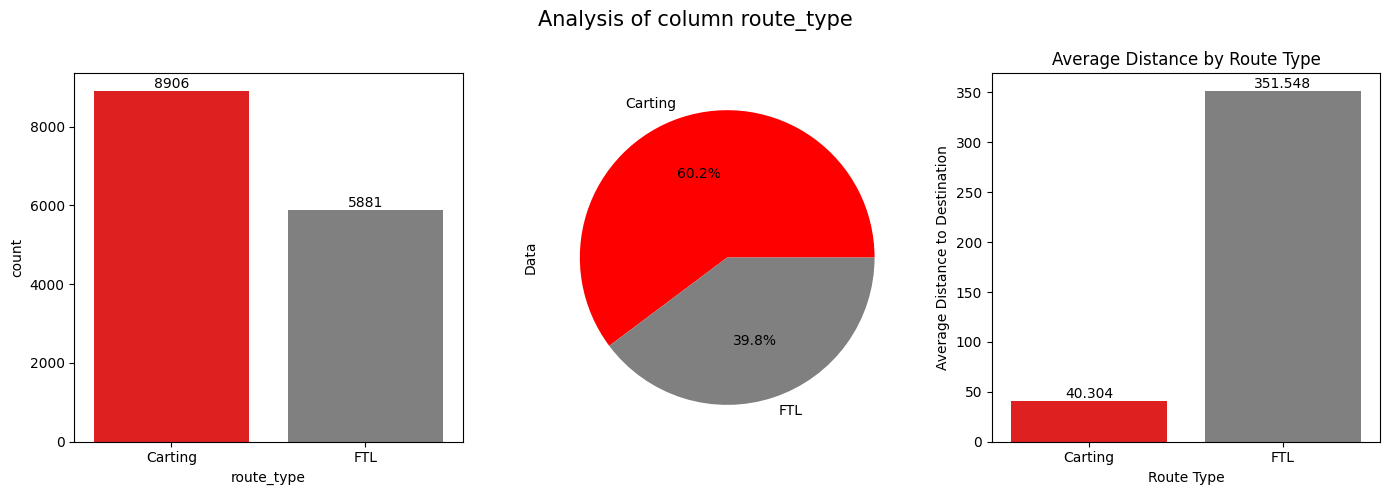

In [ ]:
# Analysis of column route_type
red_palette = ['#FF0000', '#808080']

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
label = sns.countplot(data = trip_df, x='route_type', hue = 'route_type', palette = red_palette)
for i in label.containers:
    label.bar_label(i)

plt.subplot(1, 3, 2)
labels = trip_df.groupby("route_type")["route_type"].count().index.categories
values = trip_df.groupby("route_type")["route_type"].count().values
plt.pie(values, labels = labels, autopct = "%1.1f%%", colors = red_palette)
plt.ylabel("Data")

plt.subplot(1, 3, 3)
average_distance_by_route_type = trip_df.groupby('route_type')['actual_distance_to_destination'].mean().reset_index()
label = sns.barplot(x='route_type', y='actual_distance_to_destination', data=average_distance_by_route_type, palette=red_palette)
for i in label.containers:
    label.bar_label(i)
plt.title('Average Distance by Route Type')
plt.xlabel('Route Type')
plt.ylabel('Average Distance to Destination')


plt.suptitle("Analysis of column route_type", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

- The **carting routes contribute a higher percentage when compared with FTL.**
- **Carting routes** contribute **60%** of the data.
- **FTL routes** contribute **40%** of the data.
- Average distance travelled by the **FTL is higher when compared with carting.**
- Average distance travelled by **Carting is 40 Kms**.
- Average distance travelled by **FTL is 351 Kms.**



### **Q3) Which corridors are the busiest and what are their average distances and times?**

In [ ]:
corridor_stats = trip_df.groupby('corridor').agg({
                                                  'trip_uuid': 'count',
                                                  'actual_distance_to_destination': 'mean',
                                                  'od_time_diff_hour': 'mean',
                                                  'route_type': 'first'
}).rename(columns={'trip_uuid': 'trip_count', 'actual_distance_to_destination': 'avg_distance', 'od_time_diff_hour': 'avg_time'})
corridor_stats.sort_values(by='trip_count', ascending=False).head(10)

,trip_count,avg_distance,avg_time,route_type
corridor,,,,
Bangalore_Nelmngla_H (Karnataka) --> Bengaluru_KGAirprt_HB (Karnataka),151,28.022125,3.059178,Carting
Bengaluru_Bomsndra_HB (Karnataka) --> Bengaluru_KGAirprt_HB (Karnataka),121,41.727380,3.312617,Carting
Bengaluru_KGAirprt_HB (Karnataka) --> Bangalore_Nelmngla_H (Karnataka),108,28.084732,3.191789,Carting
Pune_Tathawde_H (Maharashtra) --> Bhiwandi_Mankoli_HB (Maharashtra),107,348.259595,13.976249,FTL
Bhiwandi_Mankoli_HB (Maharashtra) --> Mumbai Hub (Maharashtra),105,21.362172,2.815456,Carting
Bangalore_Nelmngla_H (Karnataka) --> Bengaluru_Bomsndra_HB (Karnataka),100,40.207710,4.843603,Carting
Mumbai_Chndivli_PC (Maharashtra) --> Bhiwandi_Mankoli_HB (Maharashtra),99,20.117543,3.361536,Carting
Bengaluru_Bomsndra_HB (Karnataka) --> Bangalore_Nelmngla_H (Karnataka),93,76.806028,5.915998,Carting
Gurgaon_Bilaspur_HB (Haryana) --> Sonipat_Kundli_H (Haryana),92,70.133302,6.574828,Carting


**🔍OBSERVATION🔎**

- Among FTL, **Carting** contributes the highest in the Busiest corriders.

### **Q4) What is the average delivery time in hours across different route types (FTL vs. Carting)?**

In [ ]:
trip_df.groupby("route_type")["od_time_diff_hour"].median()

route_type
Carting     3.027213
FTL        11.871962
Name: od_time_diff_hour, dtype: float64

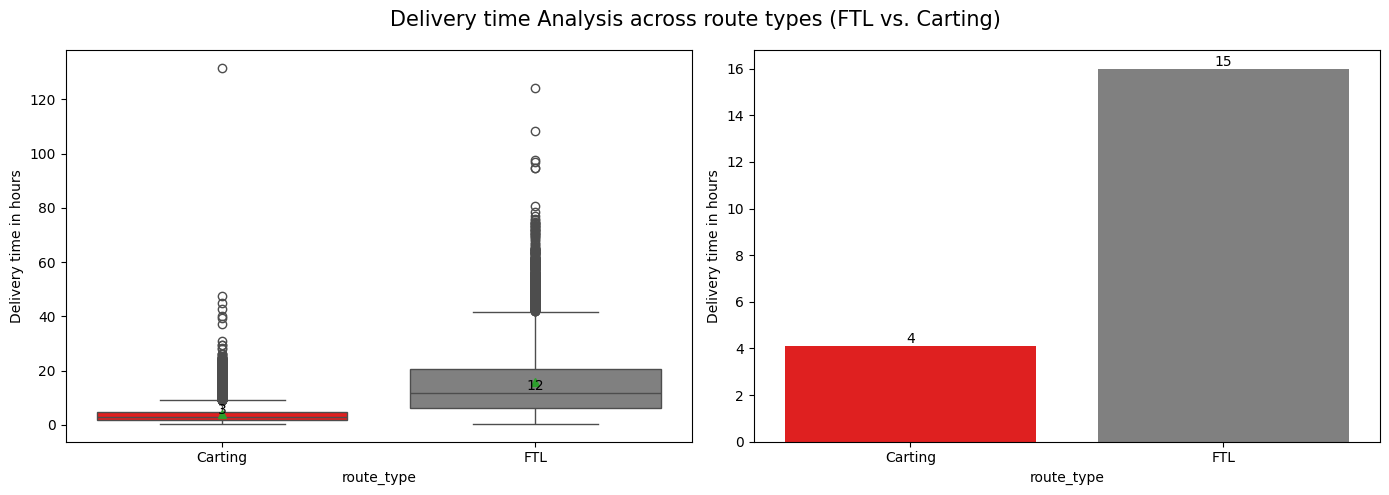

In [ ]:
# Delivery time Analysis across route types (FTL vs. Carting:
plt.figure(figsize=(14, 5))
red_palette = ['#FF0000', '#808080']

plt.subplot(1, 2, 1)
sns.boxplot(data = trip_df, x="route_type", y="od_time_diff_hour", palette = red_palette, showmeans=True)
medians = trip_df.groupby("route_type")["od_time_diff_hour"].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.0f}', horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10)
plt.xlabel('route_type')
plt.ylabel('Delivery time in hours')

plt.subplot(1, 2, 2)
gp = trip_df.groupby("route_type")["od_time_diff_hour"].mean().to_frame().reset_index()
label = sns.barplot(data = gp, x='route_type', y = 'od_time_diff_hour', palette = red_palette)
for i in label.containers:
    label.bar_label(i,label_type='edge',fmt='%d')
plt.xlabel('route_type')
plt.ylabel('Delivery time in hours')

plt.suptitle("Delivery time Analysis across route types (FTL vs. Carting)", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

- FTL has the highest average time delivery of 15 hours when compared to carting of 4 hours.

### **Q5) What are the average time differences between od_start_time and od_end_time across different states?**

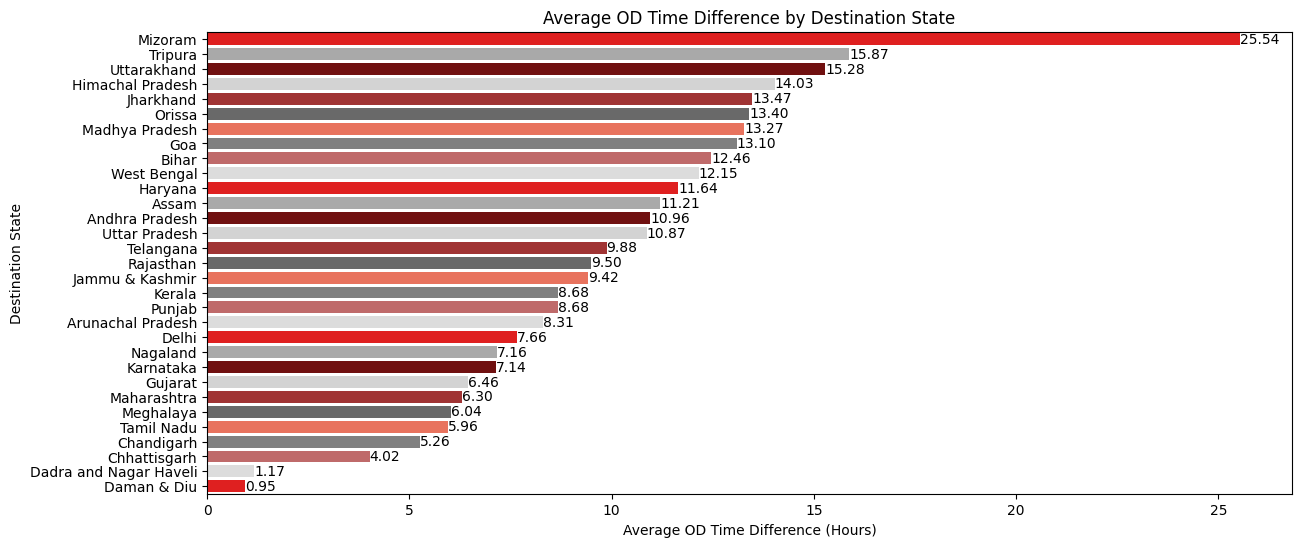

In [ ]:
# Define the red_palette
red_palette = ['#FF0000', '#A9A9A9', '#800000', '#D3D3D3', '#B22222', '#696969', '#FF6347', '#808080', '#CD5C5C', '#DCDCDC']

# Group by 'destination_state' and calculate the mean of 'od_time_diff_hour', then sort the values
state_stats = trip_df.groupby('destination_state')['od_time_diff_hour'].mean().sort_values(ascending=False).reset_index()

# Create a horizontal bar plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='od_time_diff_hour', y='destination_state', data=state_stats, palette=red_palette)
for index, value in enumerate(state_stats['od_time_diff_hour']):
      ax.text(value, index, f'{value:.2f}', va='center')

# Set title and labels
plt.title('Average OD Time Difference by Destination State')
plt.xlabel('Average OD Time Difference (Hours)')
plt.ylabel('Destination State')

# Show the plot
plt.show()

**🔍OBSERVATION🔎**

- Top states that takes highest time for delivery are **Mizoram, Tripura, Uttarakhand, Himachal Pradesh and Jharkhand.**

## <font color="red">**6.3. Outlier Detection & Treatment🕵**</font>

In [ ]:
trip_numerical_cols = trip_numerical_df.head().columns
trip_numerical_cols

Index(['od_time_diff_hour', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum'],
      dtype='object')

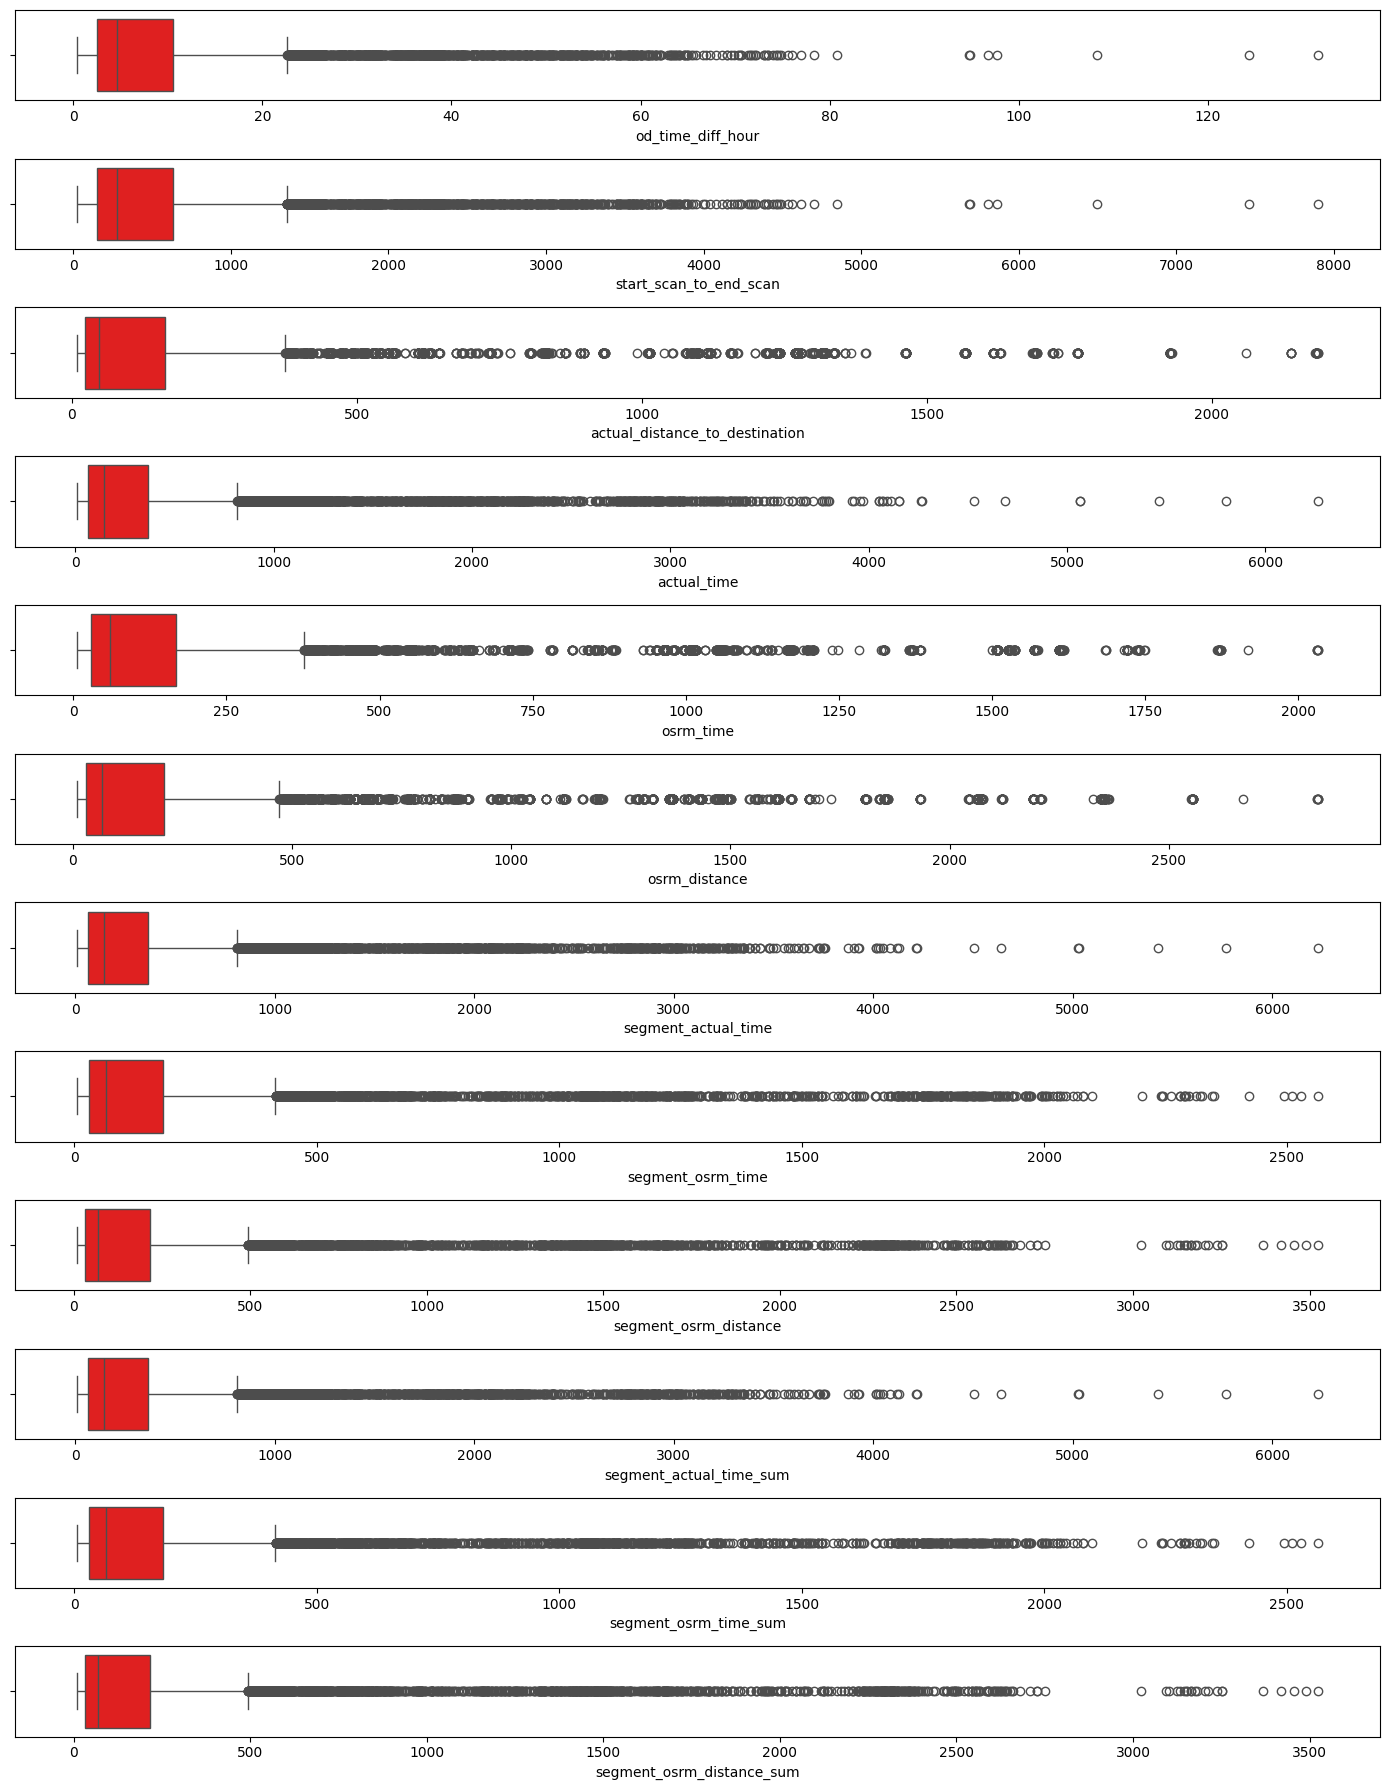

In [ ]:
# Box plots for numerical columns
red_palette = ['#FF0000']
plt.figure(figsize=(14, 18))
for i, col in enumerate(trip_numerical_cols):
    plt.subplot(len(trip_numerical_cols), 1, i+1)
    sns.boxplot(trip_df[col], orient="h",palette = red_palette)
    #plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the five point summery for each numerical column:

def detect_outliers(column):
  # Calculating the IQR:
  Q1 = np.percentile(trip_df[column],25)
  median = np.percentile(trip_df[column],50)
  Q3 = np.percentile(trip_df[column],75)
  IQR = Q3 - Q1

  # Calculating the percentage of outliers:
  lower_bound = max(trip_df[column].min(), Q1 - 1.5 * IQR)
  upper_bound = min(trip_df[column].max(), Q3 + 1.5 * IQR)
  outliers = trip_df[(trip_df[column] < lower_bound) | (trip_df[column] > upper_bound)]
  percentage_outliers = (len(outliers)/len(trip_df)) * 100
  print(f"For columns: {col}")
  print(f"Lower bound value: {lower_bound.round(2)} \nQ1: {Q1.round(2)} \nMedian: {median.round(2)} \nQ3: {Q3.round(2)} \nUpper bound value: {upper_bound.round(2)} \nIQR: {IQR.round(2)}")
  return percentage_outliers

# UIterating the numerical columns:
for col in trip_numerical_cols:
    percentage = detect_outliers(col)
    print(f"Percentage of outliers in column '{col}': {percentage:.2f}%")
    print("-" * 60)

For columns: od_time_diff_hour
Lower bound value: 0.39 
Q1: 2.49 
Median: 4.66 
Q3: 10.56 
Upper bound value: 22.65 
IQR: 8.06
Percentage of outliers in column 'od_time_diff_hour': 8.62%
------------------------------------------------------------
For columns: start_scan_to_end_scan
Lower bound value: 23.0 
Q1: 149.0 
Median: 279.0 
Q3: 632.0 
Upper bound value: 1356.5 
IQR: 483.0
Percentage of outliers in column 'start_scan_to_end_scan': 8.67%
------------------------------------------------------------
For columns: actual_distance_to_destination
Lower bound value: 9.0 
Q1: 22.78 
Median: 48.29 
Q3: 163.59 
Upper bound value: 374.81 
IQR: 140.81
Percentage of outliers in column 'actual_distance_to_destination': 9.82%
------------------------------------------------------------
For columns: actual_time
Lower bound value: 9.0 
Q1: 67.0 
Median: 148.0 
Q3: 367.0 
Upper bound value: 817.0 
IQR: 300.0
Percentage of outliers in column 'actual_time': 11.13%
----------------------------------

**🔍OBSERVATION🔎**

- We can see the outliers are present in all the numerical columns.
- The outlier  percentage for the numerical columns ranges from **8% to 11%**

**Outlier removal using IQR✅:**

In [ ]:
# Calculating IQR for each numerical columns:
Q1 = trip_numerical_df.quantile(0.25)
Q3 = trip_numerical_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

od_time_diff_hour                   8.063987
start_scan_to_end_scan            483.000000
actual_distance_to_destination    140.814159
actual_time                       300.000000
osrm_time                         139.000000
osrm_distance                     175.887300
segment_actual_time               298.000000
segment_osrm_time                 154.000000
segment_osrm_distance             183.981750
segment_actual_time_sum           298.000000
segment_osrm_time_sum             154.000000
segment_osrm_distance_sum         183.981750
dtype: float64


In [ ]:
# Outliers filteration:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
trip_df_iqr = trip_df[~((trip_numerical_df < lower_bound)|(trip_numerical_df > upper_bound)).any(axis=1)]

In [ ]:
# Checking the number of outliered rows and percentage of outliered rows removed
diff = len(trip_df) - len(trip_df_iqr)
outlier_removel_percentage = (diff * 100)/(len(trip_df))
print(f"Number of outliered rows removed :{diff}\nPercentage of outliered rows removed is {outlier_removel_percentage:.2f}%")

Number of outliered rows removed :2064
Percentage of outliered rows removed is 13.96%


**🔍OBSERVATION🔎**

- We have done **IQR technique** for removing the outliers and we have **removed around 14% of the outliered data**.

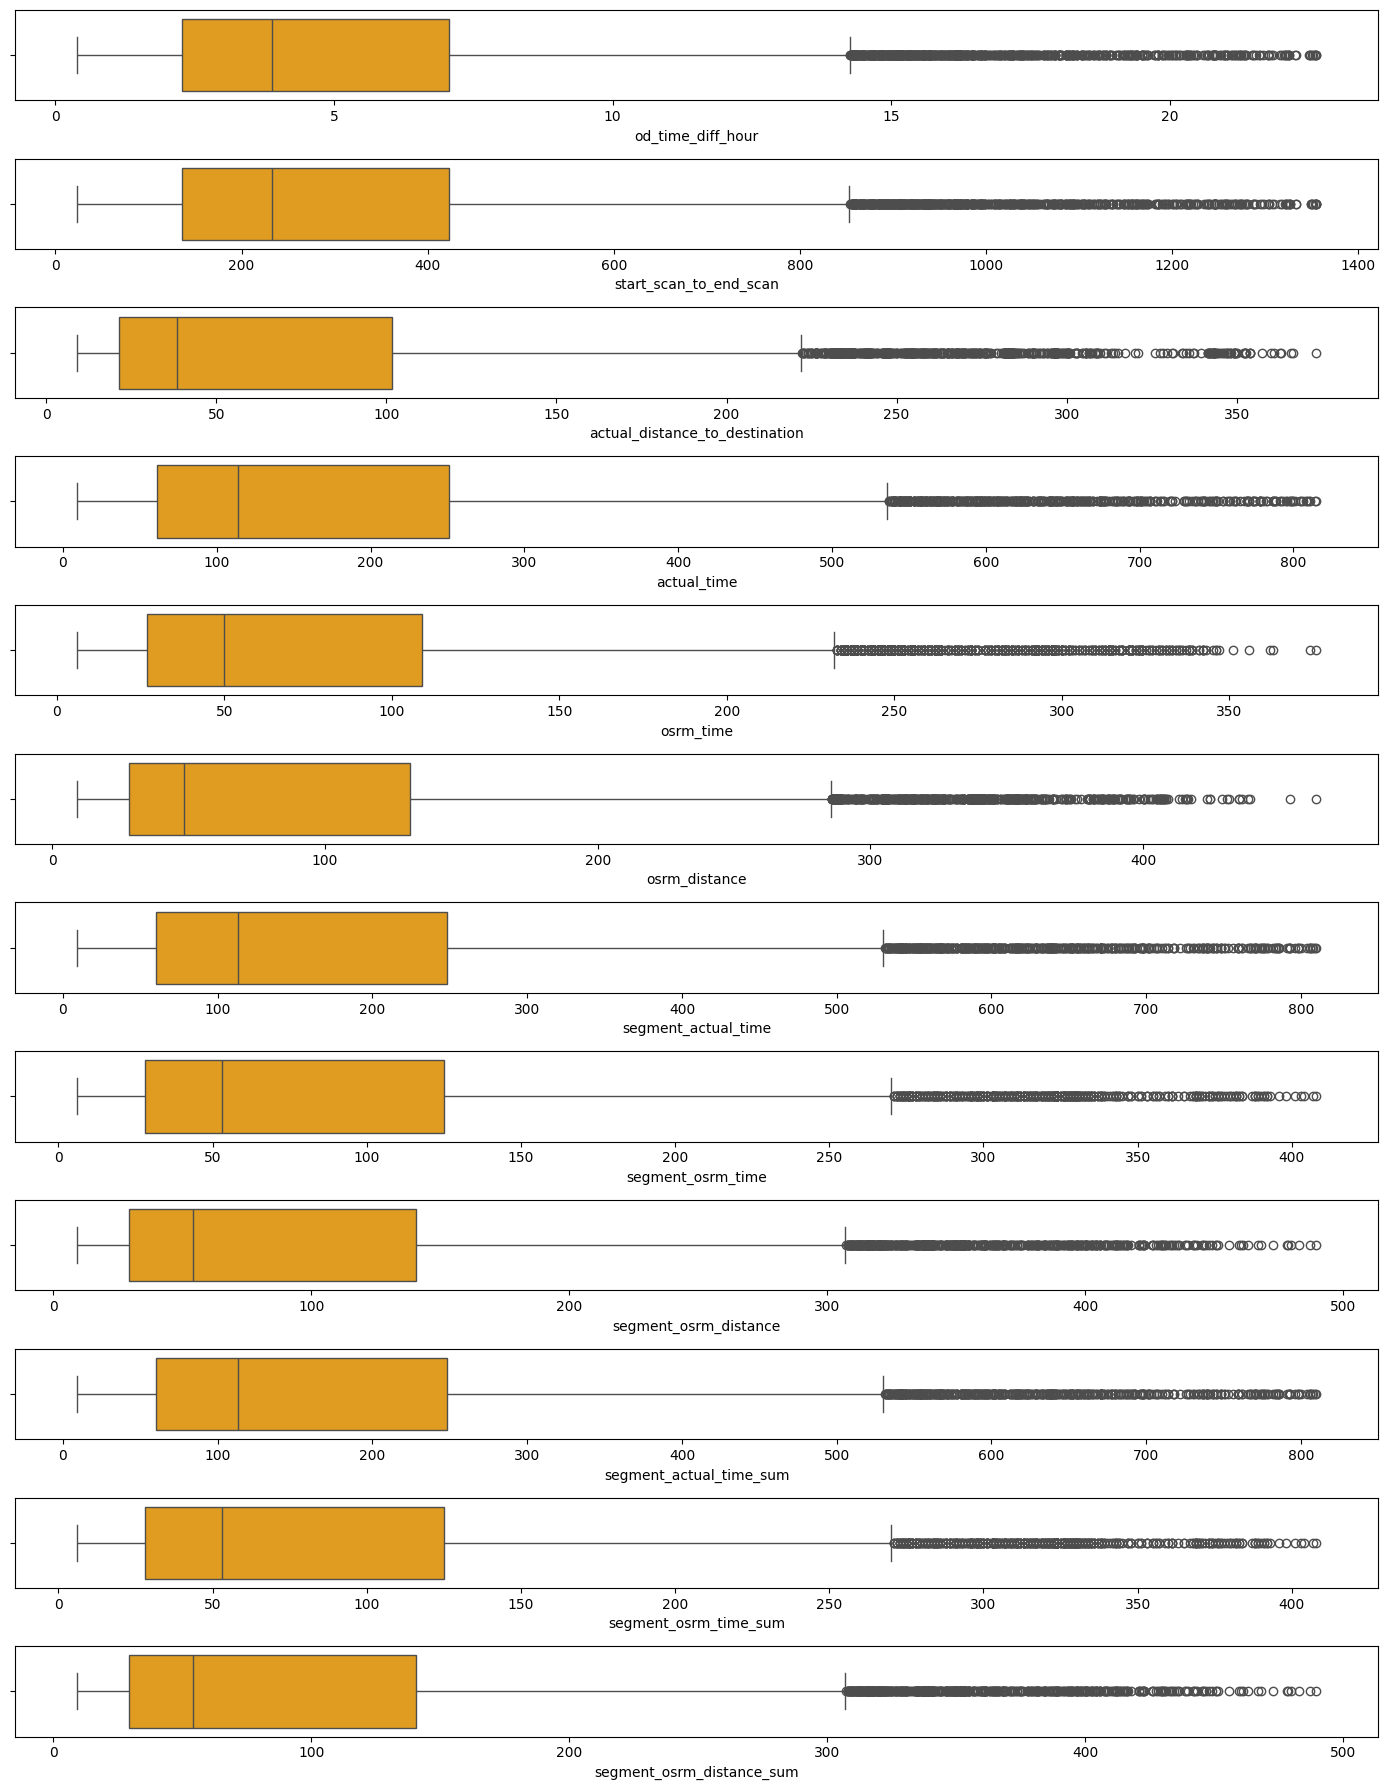

In [ ]:
# Box plots for numerical columns
red_palette = ['#FF0000']
plt.figure(figsize=(14, 18))
for i, col in enumerate(trip_numerical_cols):
    plt.subplot(len(trip_numerical_cols), 1, i+1)
    sns.boxplot(trip_df_iqr[col], orient="h",color="orange")
    #plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the five point summery for each numerical column:

def detect_outliers(column):
  # Calculating the IQR:
  Q1 = np.percentile(trip_df_iqr[column],25)
  median = np.percentile(trip_df_iqr[column],50)
  Q3 = np.percentile(trip_df_iqr[column],75)
  IQR = Q3 - Q1

  # Calculating the percentage of outliers:
  lower_bound = max(trip_df_iqr[column].min(), Q1 - 1.5 * IQR)
  upper_bound = min(trip_df_iqr[column].max(), Q3 + 1.5 * IQR)
  outliers = trip_df_iqr[(trip_df_iqr[column] < lower_bound) | (trip_df_iqr[column] > upper_bound)]
  percentage_outliers = (len(outliers)/len(trip_df_iqr)) * 100
  print(f"For columns: {col}")
  print(f"Lower bound value: {lower_bound.round(2)} \nQ1: {Q1.round(2)} \nMedian: {median.round(2)} \nQ3: {Q3.round(2)} \nUpper bound value: {upper_bound.round(2)} \nIQR: {IQR.round(2)}")
  return percentage_outliers

# UIterating the numerical columns:
for col in trip_numerical_cols:
    percentage = detect_outliers(col)
    print(f"Percentage of outliers in column '{col}': {percentage:.2f}%")
    print("-" * 60)

For columns: od_time_diff_hour
Lower bound value: 0.39 
Q1: 2.28 
Median: 3.89 
Q3: 7.07 
Upper bound value: 14.25 
IQR: 4.79
Percentage of outliers in column 'od_time_diff_hour': 5.62%
------------------------------------------------------------
For columns: start_scan_to_end_scan
Lower bound value: 23.0 
Q1: 136.0 
Median: 233.0 
Q3: 423.0 
Upper bound value: 853.5 
IQR: 287.0
Percentage of outliers in column 'start_scan_to_end_scan': 5.60%
------------------------------------------------------------
For columns: actual_distance_to_destination
Lower bound value: 9.0 
Q1: 21.4 
Median: 38.53 
Q3: 101.67 
Upper bound value: 222.09 
IQR: 80.28
Percentage of outliers in column 'actual_distance_to_destination': 5.60%
------------------------------------------------------------
For columns: actual_time
Lower bound value: 9.0 
Q1: 61.0 
Median: 114.0 
Q3: 251.0 
Upper bound value: 536.0 
IQR: 190.0
Percentage of outliers in column 'actual_time': 4.39%
---------------------------------------

**🔍OBSERVATION🔎**
- The outliers are removed using the **IQR technique.**
- We can see the outliers are present still in all the numerical columns but the percentage of **outliers in each column is reduced around 50%**
- The outlier  percentage ranges from **4% to 6%**

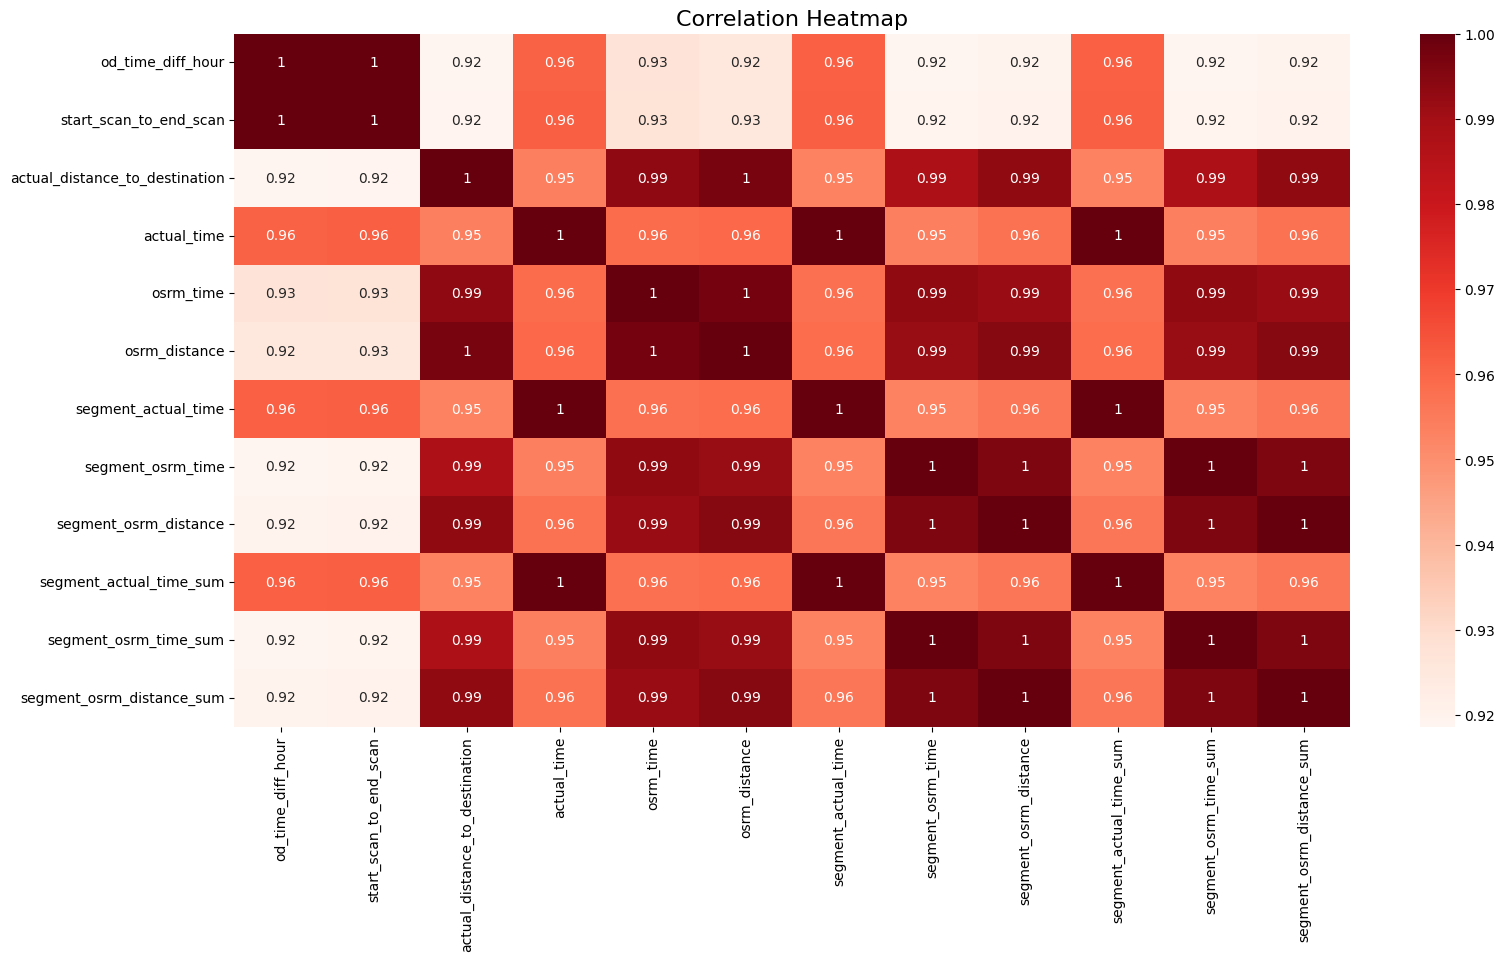

In [ ]:
# Correlation score using heatmap:
plt.figure(figsize=(18, 9))
sns.heatmap(trip_numerical_df.corr(),cmap="Reds", annot=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## <font color="red">**6.4 One-hot encoding💻**</font>

In [ ]:
# Number of unique values in each columns:
print("Number of unique values in each columns:")
print("-" * 40)
for elem in trip_df_iqr.columns:
  print(f"{elem}: {trip_df_iqr[elem].nunique()}")

Number of unique values in each columns:
----------------------------------------
trip_uuid: 12723
data: 2
route_type: 2
od_start_time: 12723
od_end_time: 12723
od_time_diff_hour: 12723
trip_creation_time: 12723
trip_creation_year: 1
trip_creation_month: 2
trip_creation_day: 22
trip_creation_hour: 24
trip_creation_day_of_week: 7
trip_creation_week_of_year: 4
trip_creation_quarter: 2
start_scan_to_end_scan: 1171
actual_distance_to_destination: 12707
actual_time: 753
osrm_time: 344
osrm_distance: 12641
segment_actual_time: 742
segment_osrm_time: 385
segment_osrm_distance: 12661
segment_actual_time_sum: 742
segment_osrm_time_sum: 385
segment_osrm_distance_sum: 12661
source_name: 902
source_city: 690
source_state: 28
source_place: 713
destination_name: 1002
destination_city: 811
destination_state: 31
destination_place: 801
corridor: 1592


In [ ]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns
cat_columns = ['data', 'route_type']

# Instantiate the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(trip_df_iqr[cat_columns])

# Get the column names for the one-hot encoded columns
encoded_columns = encoder.get_feature_names_out(cat_columns)

# Create a DataFrame with the encoded data
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns)

# Join the encoded columns with the original DataFrame (excluding the original categorical columns)
df_encoded = trip_df_iqr.join(df_encoded)

In [ ]:
df_encoded[['data_test', 'data_training', 'route_type_Carting', 'route_type_FTL']]

,data_test,data_training,route_type_Carting,route_type_FTL
1,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0
5,0.0,1.0,1.0,0.0
6,0.0,1.0,1.0,0.0
...,...,...,...,...
14782,NaN,NaN,NaN,NaN
14783,NaN,NaN,NaN,NaN
14784,NaN,NaN,NaN,NaN
14785,NaN,NaN,NaN,NaN


In [ ]:
df_encoded.head(2)

,trip_uuid,data,route_type,od_start_time,od_end_time,od_time_diff_hour,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,...,source_place,destination_name,destination_city,destination_state,destination_place,corridor,data_test,data_training,route_type_Carting,route_type_FTL
1,trip-153671042288605164,training,Carting,2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,3.026865,2018-09-12 00:00:22.886430,2018,9,12,...,ChikaDPP,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur,Karnataka,ChikaDPP,Doddablpur_ChikaDPP_D (Karnataka) --> Chikblap...,0.0,1.0,1.0,0.0
3,trip-153671046011330457,training,Carting,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,1.674916,2018-09-12 00:01:00.113710,2018,9,12,...,Hub,Mumbai_MiraRd_IP (Maharashtra),Mumbai,Maharashtra,MiraRd,Mumbai Hub (Maharashtra) --> Mumbai_MiraRd_IP ...,0.0,1.0,1.0,0.0


## <font color="red">**6.5 Normalization (or) Min max scaler for numerical features🔢**</font>  

**Since the distribution of numerical data are not normally distributed we can go with Normalization (or) Min max scaler.**

In [ ]:
trip_numerical_cols

Index(['od_time_diff_hour', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'segment_osrm_distance_sum'],
      dtype='object')

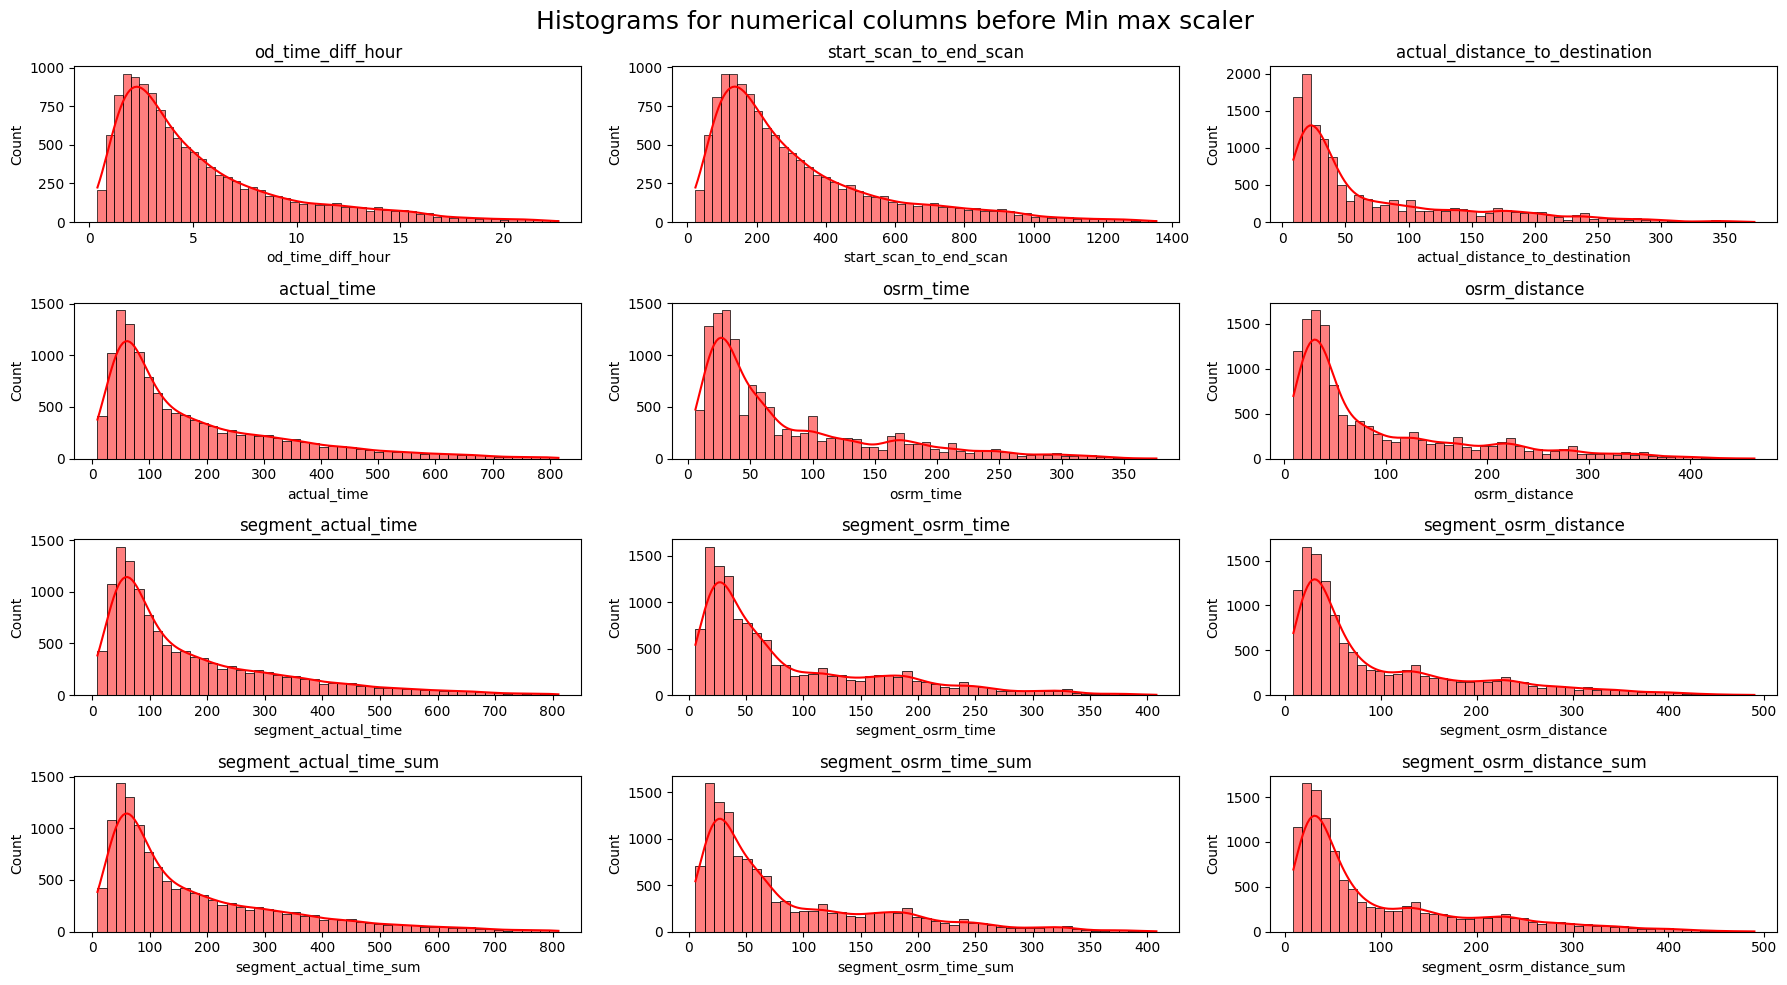

In [ ]:
# Histograms for numerical columns before Min max scaler
plt.figure(figsize=(18,10))
for i, elem in enumerate(trip_numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(trip_df_iqr[elem], kde=True, color='red')
  plt.title(elem)
plt.suptitle("Histograms for numerical columns before Min max scaler", fontsize = 18)
plt.tight_layout()
plt.show()

In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized_trip = pd.DataFrame(scaler.fit_transform(trip_df_iqr[trip_numerical_cols]), columns=trip_numerical_cols)
df_normalized_trip

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,0.118559,0.117868,0.176119,0.166253,0.167568,0.167335,0.164794,0.146766,0.156330,0.164794,0.146766,0.156330
1,0.057749,0.057808,0.022426,0.062035,0.024324,0.023343,0.062422,0.024876,0.022484,0.062422,0.024876,0.022484
2,0.520930,0.521021,0.325009,0.411911,0.300000,0.303075,0.413233,0.271144,0.286617,0.413233,0.271144,0.286617
3,0.125213,0.124625,0.042791,0.064516,0.045946,0.041795,0.063670,0.042289,0.039525,0.063670,0.042289,0.039525
4,0.055883,0.056306,0.000269,0.018610,0.018919,0.006482,0.018727,0.017413,0.006130,0.018727,0.017413,0.006130
...,...,...,...,...,...,...,...,...,...,...,...,...
12718,0.175846,0.175676,0.133794,0.091811,0.151351,0.141702,0.091136,0.139303,0.116092,0.091136,0.139303,0.116092
12719,0.027834,0.027778,0.017867,0.014888,0.016216,0.015438,0.014981,0.012438,0.014600,0.014981,0.012438,0.014600
12720,0.298859,0.298799,0.081447,0.338710,0.113514,0.109662,0.339576,0.203980,0.199405,0.339576,0.203980,0.199405
12721,0.243678,0.243243,0.344973,0.316377,0.467568,0.356592,0.310861,0.534826,0.446327,0.310861,0.534826,0.446327


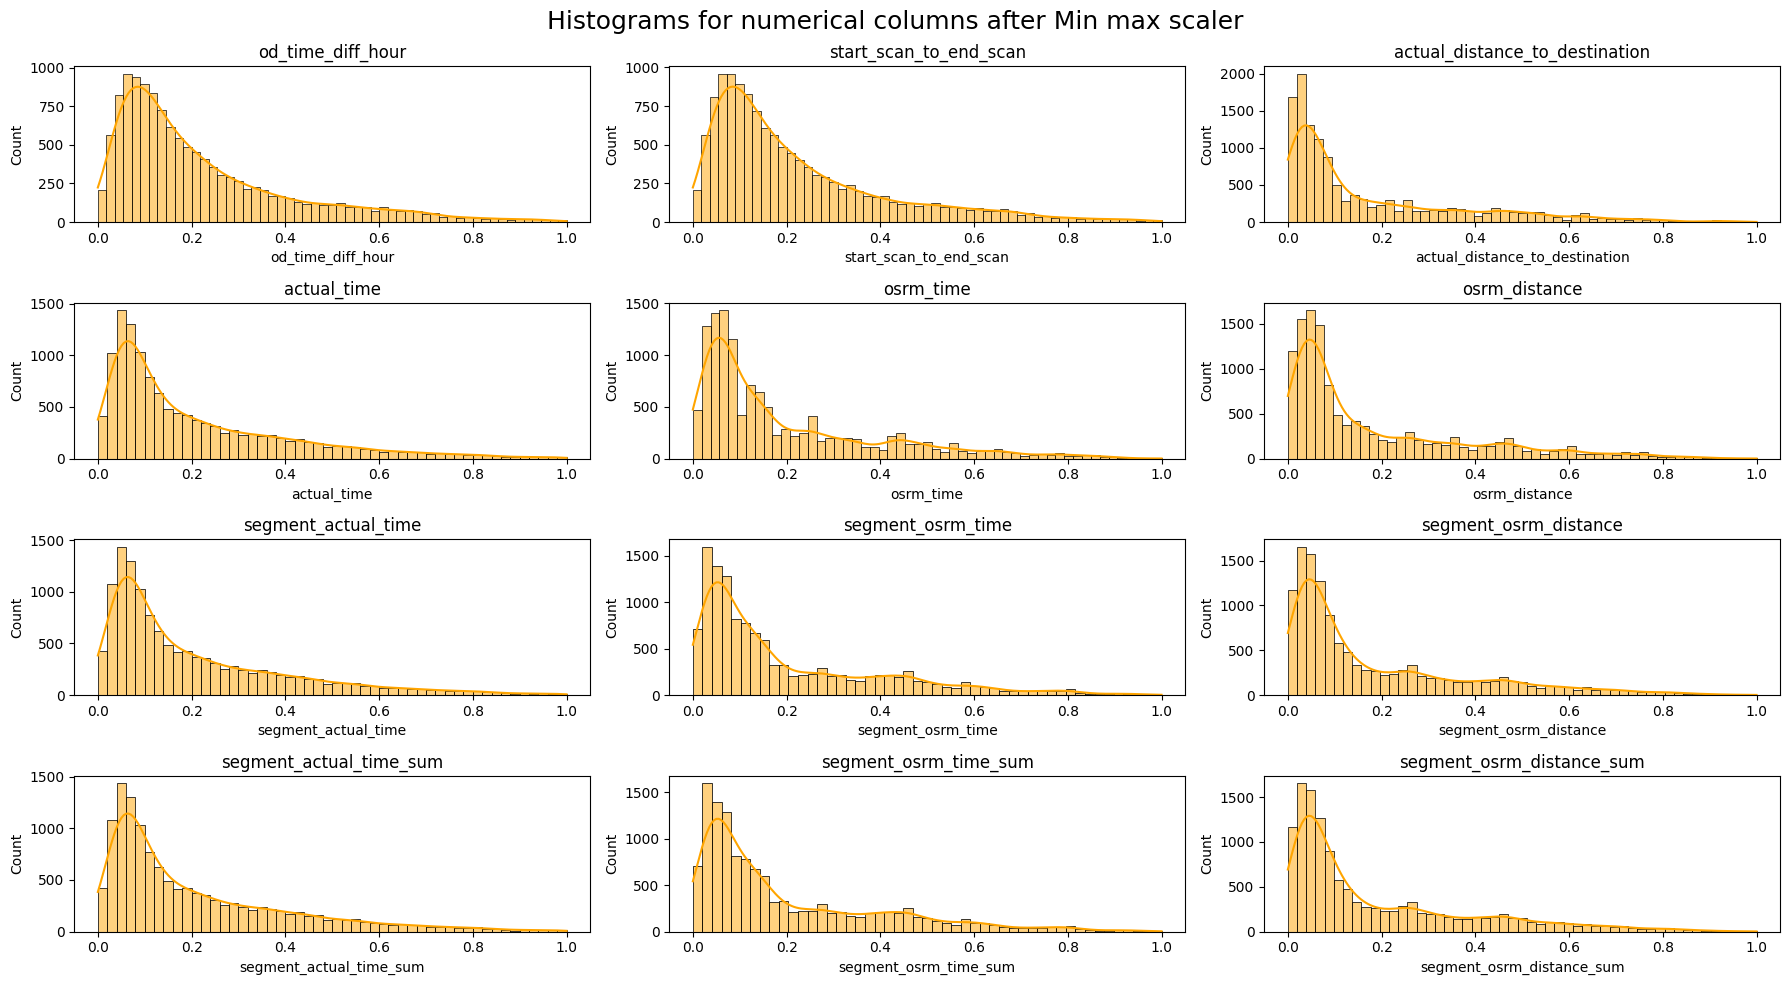

In [ ]:
# Histograms for numerical columns after Min max scale
plt.figure(figsize=(18,10))
for i, elem in enumerate(trip_numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df_normalized_trip[elem], kde=True, color='orange')
  plt.title(elem)
plt.suptitle("Histograms for numerical columns after Min max scaler", fontsize = 18)
plt.tight_layout()
plt.show()

# **7. Hypothesis Testing🧪**

## <font color="red">**7.1 Defining the required functions**</font>

In [ ]:
# Function for Histogram and Q-Q Plot- Normality Check
import scipy.stats as stats

def normality(df, col1, col2):

    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    plt.suptitle("Normality check", fontsize = 15)

    # Histogram for col1
    sns.histplot(df[col1], kde=True, color='red', ax=axes[0, 0])
    axes[0, 0].set_title(f'Histogram of {col1}')

    # Q-Q plot for col1
    stats.probplot(df[col1], dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title(f'Q-Q Plot of {col1}')

    # Histogram for col2
    sns.histplot(df[col2], kde=True,color='red', ax=axes[1, 0])
    axes[1, 0].set_title(f'Histogram of {col2}')

    # Q-Q plot for col2
    stats.probplot(df[col2], dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title(f'Q-Q Plot of {col2}')

    plt.tight_layout()
    plt.show()

In [ ]:
# Function for Shapiro-Wilk Test - Normality:
from scipy.stats import shapiro

def shapiro_test(df, col1, col2):
  column_dict = {col1: df[col1], col2: df[col2]}

  for name, data in column_dict.items():
    # Perform Shapiro-Wilk Test
    shapiro_stat , p_val = shapiro(data)

    print(f'Shapiro-Wilk Test for {name}:')
    print(f'Statistics={shapiro_stat:.4f}, p-value={p_val:.4f}')

    alpha = 0.05
    if p_val < alpha:
      print(f'{name} is not Gaussian distribution')
      print()
    else:
      print(f'{name} is Gaussian distribution')
      print()

In [ ]:
# Function for Levene's test - Equality of Variances:
from scipy.stats import levene

def Levene(df, col1, col2):
    # Formulate Hypotheses
    # Ho: Variances of the two groups are approximately equal.
    # H1: Variances of the two groups are different.

    # Perform Levene's test
    stat, p = levene(df[col1], df[col2])

    print('Levene_stat : ', stat)
    print('p-value : ', p)

    if p < 0.05:
      print("Variances of the two groups are different")
    else:
      print("Variances of the two groups are approximately equal")

## <font color="red">**Q1) actual_time aggregated value and OSRM time aggregated value.**</font>

In [ ]:
trip_df_iqr[['actual_time','osrm_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,12723.0,177.452723,158.150841,9.0,61.0,114.0,251.0,815.0
osrm_time,12723.0,78.440305,72.333674,6.0,27.0,50.0,109.0,376.0


**Introduction**

- When comparing "actual_time" and "OSRM time," we can use a paired t-test if the data is normally distributed or a non-parametric test like the Wilcoxon signed-rank test if it's not.

**Why paired t-test?**

- Each "actual_time" value corresponds directly to an "OSRM time" value for the same trip. This implies that the measurements are paired or dependent so we can go with paired t-test

**Perform Hypothesis Testing**

**1. Formulate the Hypotheses**

  - **Null Hypothesis (H0):** There is no significant difference between the actual time and OSRM time.
  - **Alternative Hypothesis (H1)**: There is a significant difference between the actual time and OSRM time.

**2. Check Assumptions:**
- **Normality:** Use the Q-Q Plot and Shapiro-Wilk test to check if the data is normally distributed.
- **Equality of Variances:** Use Levene's test to check if the variances are equal.

**3. Choose the Appropriate Test**
  - If the data is **normally distributed, use a paired t-test.**
  - If the data is **not normally distributed, use the Wilcoxon signed-rank test.**

**Normality:**

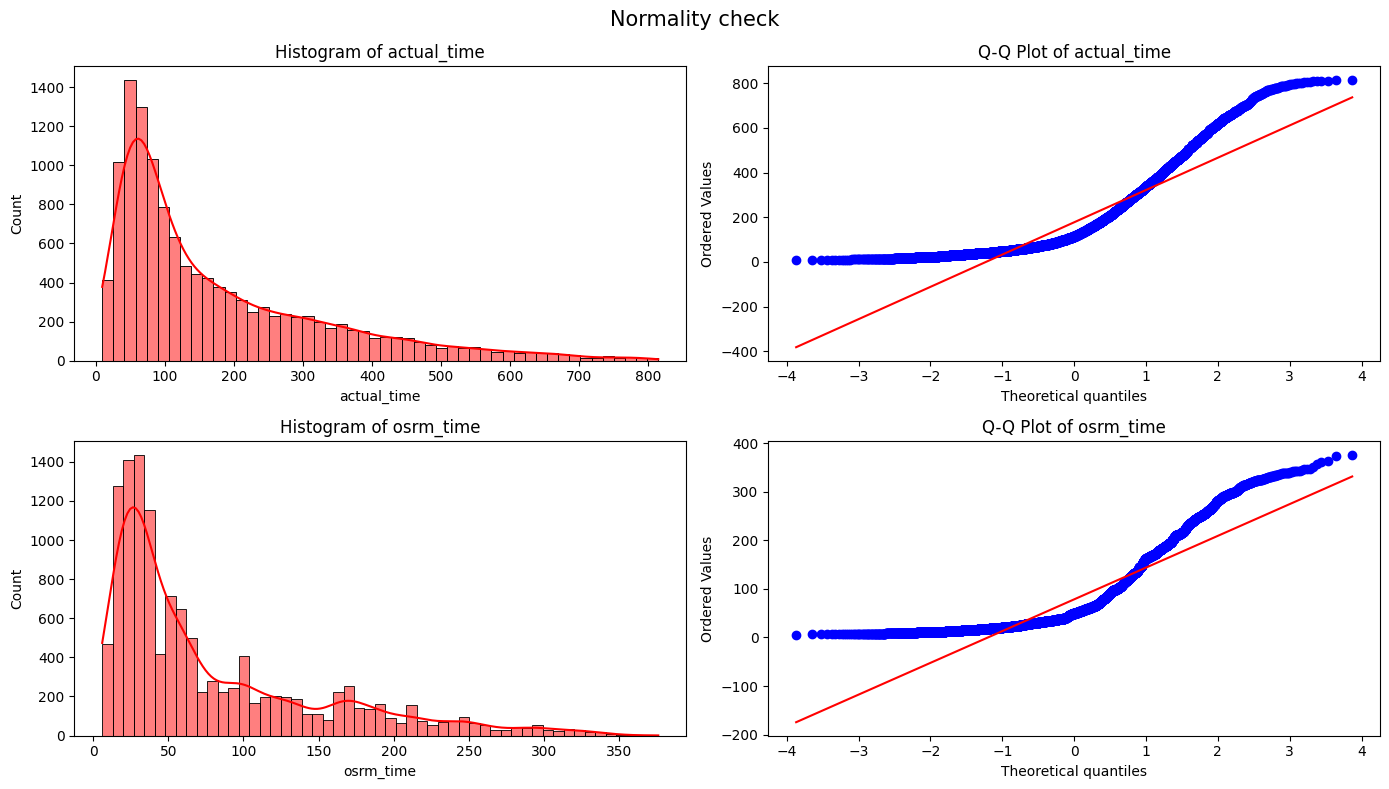

In [ ]:
# 2. Check Assumptions - Normality:
# Normality check by calling normality function
normality(trip_df_iqr, "actual_time", "osrm_time")

In [ ]:
# Shapiro-Wilk Test by calling shapiro_test function
shapiro_test(trip_df_iqr, 'actual_time', 'osrm_time')

Shapiro-Wilk Test for actual_time:
Statistics=0.8328, p-value=0.0000
actual_time is not Gaussian distribution

Shapiro-Wilk Test for osrm_time:
Statistics=0.8150, p-value=0.0000
osrm_time is not Gaussian distribution



**Equality of Variances:**

In [ ]:
# Levene's test - Equality of Variances:
Levene(trip_df_iqr, 'actual_time', 'osrm_time')

Levene_stat :  2622.798122016967
p-value :  0.0
Variances of the two groups are different


**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Wilcoxon signed-rank test - Right tailed** with **Confidence level of 95%**

In [ ]:
# 4. Hypothesis Test
from scipy.stats import wilcoxon

# Formulate Hypotheses
# H0: The mean of actual_time and osrm_time are equal
# H1: The mean of actual_time is greater than osrm_time

# Choose the significance level
alpha = 0.05

# Perform Wilcoxon signed-rank test - RIGHT TAILED since the mean of actual_time > osrm_time
stat, p = wilcoxon(trip_df_iqr['actual_time'], trip_df_iqr['osrm_time'], alternative='greater')
print(f"Wilcoxon signed-rank test:")

if p < alpha:
    print('The mean of actual_time is greater than osrm_time (Reject Null Hypothesis)')
else:
    print('The mean of actual_time and osrm_time are equal(Failed to Reject Null Hypothesis)')

Wilcoxon signed-rank test:
The mean of actual_time is greater than osrm_time (Reject Null Hypothesis)


**🔍CONCLUSION🔎**

- Based on the **Wilcoxon signed-rank test - Right tailed**, we can conclude that **The mean of actual_time is greater than osrm_time**.

## <font color="red">**Q2) actual_time aggregated value and segment actual time aggregated value.**</font>

In [ ]:
trip_df_iqr[['actual_time','segment_actual_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,12723.0,177.452723,158.150841,9.0,61.0,114.0,251.0,815.0
segment_actual_time,12723.0,175.796274,157.099770,9.0,60.0,113.0,248.0,810.0


**Introduction**

- When comparing "actual_time" and "segment_actual_time," we can use a paired t-test if the data is normally distributed or a non-parametric test like the Wilcoxon signed-rank test if it's not.

**Perform Hypothesis Testing**

**1. Formulate the Hypotheses**

  - **Null Hypothesis (H0):** There is no significant difference between the actual time and segment_actual_time.
  - **Alternative Hypothesis (H1)**: There is a significant difference between the actual time and segment_actual_time.

**2. Check Assumptions:**
- **Normality:** Use the Q-Q Plot and Shapiro-Wilk test to check if the data is normally distributed.
- **Equality of Variances:** Use Levene's test to check if the variances are equal.

**3. Choose the Appropriate Test**
  - If the data is **normally distributed, use a paired t-test.**
  - If the data is **not normally distributed, use the Wilcoxon signed-rank test.**

**Normality:**

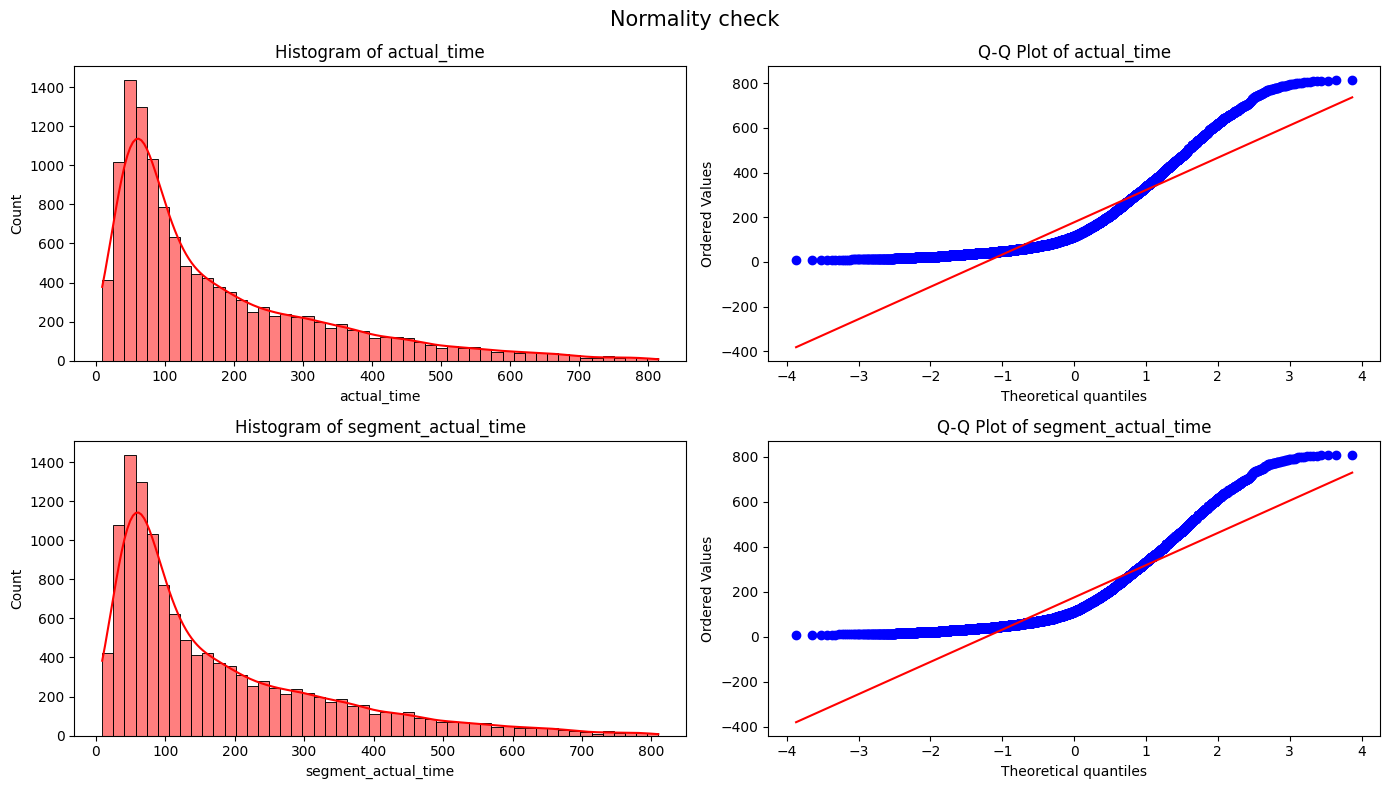

In [ ]:
# 2. Check Assumptions - Normality:
# Normality check by calling normality function
normality(trip_df_iqr, "actual_time", "segment_actual_time")

In [ ]:
# Shapiro-Wilk Test by calling shapiro_test function
shapiro_test(trip_df_iqr, 'actual_time', 'segment_actual_time')

Shapiro-Wilk Test for actual_time:
Statistics=0.8328, p-value=0.0000
actual_time is not Gaussian distribution

Shapiro-Wilk Test for segment_actual_time:
Statistics=0.8319, p-value=0.0000
segment_actual_time is not Gaussian distribution



**Equality of Variances:**

In [ ]:
# Levene's test - Equality of Variances:
Levene(trip_df_iqr, 'actual_time', 'segment_actual_time')

Levene_stat :  0.30797337672704056
p-value :  0.5789313514146436
Variances of the two groups are approximately equal


**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Wilcoxon signed-rank test** with **Confidence level of 95%**

In [ ]:
# 4. Hypothesis Test
from scipy.stats import wilcoxon

# Formulate Hypotheses
# H0: The mean of actual_time and segment_actual_time are equal
# H1: The mean of actual_time and segment_actual_time are different

# Choose the significance level
alpha = 0.05

# Perform Wilcoxon signed-rank test
stat, p = wilcoxon(trip_df_iqr['actual_time'], trip_df_iqr['segment_actual_time'])
print(f"Wilcoxon signed-rank test:")

if p < alpha:
    print('The mean of actual_time and segment_actual_time are different (Reject Null Hypothesis)')
else:
    print('The mean of actual_time and segment_actual_time are equal(Failed to Reject Null Hypothesis)')

Wilcoxon signed-rank test:
The mean of actual_time and segment_actual_time are different (Reject Null Hypothesis)


**4.perform the Hypothesis Test**
- Since the data has same variance as per the Levene's test we can perform **Paired t-test** with **Confidence level of 95%**

In [ ]:
# 4. Hypothesis Test
from scipy.stats import wilcoxon

# Formulate Hypotheses
# H0: The mean of actual_time and segment_actual_time are equal
# H1: The mean of actual_time and segment_actual_time are different

# Choose the significance level
alpha = 0.05

# Perform Paired t-test
stat, p = stats.ttest_rel(trip_df_iqr['actual_time'],  trip_df_iqr['segment_actual_time'])
print(f"Paired t-test:")

if p < alpha:
    print('The mean of actual_time and segment_actual_time are different (Reject Null Hypothesis)')
else:
    print('The mean of actual_time and segment_actual_time are equal(Failed to Reject Null Hypothesis)')

Paired t-test:
The mean of actual_time and segment_actual_time are different (Reject Null Hypothesis)


**4.perform the Hypothesis Test**
- Since we have got the result that mean of actual_time and segment_actual_time are different from the above tests, we can perform the **Wilcoxon signed-rank test- Right tailed** to check if actual_time is greater than segment_actual_time with **Confidence level of 95%**

In [ ]:
# 4. Hypothesis Test
from scipy.stats import wilcoxon

# Formulate Hypotheses
# H0: The mean of actual_time and segment_actual_time are equal
# H1: The mean of actual_time is greater than segment_actual_time

# Choose the significance level
alpha = 0.05

# Perform Wilcoxon signed-rank test - RIGHT TAILED since the mean of actual_time > segment_actual_time
stat, p = wilcoxon(trip_df_iqr['actual_time'], trip_df_iqr['segment_actual_time'], alternative='greater')
print(f"Wilcoxon signed-rank test:")

if p < alpha:
    print('The mean of actual_time is greater than segment_actual_time (Reject Null Hypothesis)')
else:
    print('The mean of actual_time and segment_actual_time are equal(Failed to Reject Null Hypothesis)')

Wilcoxon signed-rank test:
The mean of actual_time is greater than segment_actual_time (Reject Null Hypothesis)


**🔍CONCLUSION🔎**

- Based on the Wilcoxon signed-rank test and Paired t-test we can conclude that the mean of actual_time and segment_actual_time are different.

- Based on the **Wilcoxon signed-rank test- Right tailed** we can conclude that **the mean of actual_time is greater than segment_actual_time.**

## <font color="red">**Q3) OSRM distance aggregated value and segment OSRM distance aggregated value.**</font>

In [ ]:
trip_df_iqr[['osrm_distance','segment_osrm_distance']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_distance,12723.0,91.734030,89.566572,9.0729,28.34445,48.4183,131.31685,463.4781
segment_osrm_distance,12723.0,97.971558,94.819043,9.0729,29.43795,54.0903,140.52940,489.5716


**Introduction**

- When comparing "osrm_distance" and "segment_osrm_distance," we can use a paired t-test if the data is normally distributed or a non-parametric test like the Wilcoxon signed-rank test if it's not.

**Perform Hypothesis Testing**

**1. Formulate the Hypotheses**

  - **Null Hypothesis (H0):** There is no significant difference between the osrm_distance and segment_osrm_distance.
  - **Alternative Hypothesis (H1)**: There is a significant difference between the osrm_distance and segment_osrm_distance.

**2. Check Assumptions:**
- **Normality:** Use the Q-Q Plot and Shapiro-Wilk test to check if the data is normally distributed.
- **Equality of Variances:** Use Levene's test to check if the variances are equal.

**3. Choose the Appropriate Test**
  - If the data is **normally distributed, use a paired t-test.**
  - If the data is **not normally distributed, use the Wilcoxon signed-rank test.**

**Normality:**

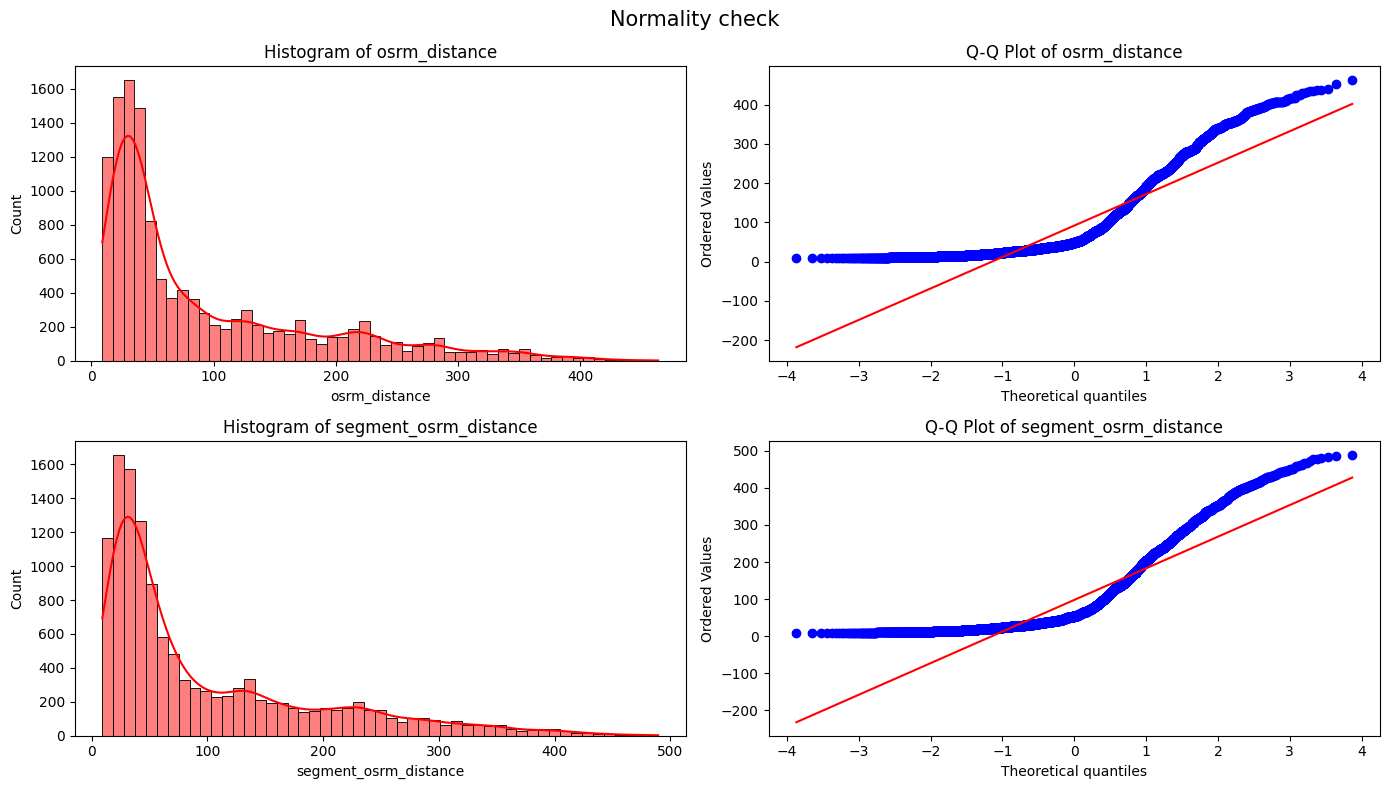

In [ ]:
# 2. Check Assumptions - Normality:
# Normality check by calling normality function
normality(trip_df_iqr, "osrm_distance", "segment_osrm_distance")

In [ ]:
# Shapiro-Wilk Test by calling shapiro_test function
shapiro_test(trip_df_iqr, 'osrm_distance', 'segment_osrm_distance')

Shapiro-Wilk Test for osrm_distance:
Statistics=0.7997, p-value=0.0000
osrm_distance is not Gaussian distribution

Shapiro-Wilk Test for segment_osrm_distance:
Statistics=0.8078, p-value=0.0000
segment_osrm_distance is not Gaussian distribution



**Equality of Variances:**

In [ ]:
# Levene's test - Equality of Variances:
Levene(trip_df_iqr, 'osrm_distance', 'segment_osrm_distance')

Levene_stat :  18.964816702075854
p-value :  1.3367122634922023e-05
Variances of the two groups are different


**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Wilcoxon signed-rank test** with **Confidence level of 95%**

In [ ]:
# 4. Hypothesis Test
from scipy.stats import wilcoxon

# Formulate Hypotheses
# H0: The mean of osrm_distance and segment_osrm_distance are equal
# H1: The mean of osrm_distance and segment_osrm_distance are different

# Choose the significance level
alpha = 0.05

# Perform Wilcoxon signed-rank test
stat, p = wilcoxon(trip_df_iqr['osrm_distance'], trip_df_iqr['segment_osrm_distance'])
print(f"Wilcoxon signed-rank test:")

if p < alpha:
    print('The mean of osrm_distance and segment_osrm_distance are different (Reject Null Hypothesis)')
else:
    print('The mean of osrm_distance and segment_osrm_distance are equal(Failed to Reject Null Hypothesis)')

Wilcoxon signed-rank test:
The mean of osrm_distance and segment_osrm_distance are different (Reject Null Hypothesis)


**4. Perform the Hypothesis Test**

- Since we have got the result that the mean of osrm_distance and segment_osrm_distance are different from the above test, we can perform the **Wilcoxon signed-rank test- Left tailed** to check if osrm_distance is less than segment_osrm_distance with **Confidence level of 95%**

In [ ]:
# 4. Hypothesis Test
from scipy.stats import wilcoxon

# Formulate Hypotheses
# H0: The mean of osrm_distance and segment_osrm_distance are equal
# H1: The mean of osrm_distance is less than segment_osrm_distance

# Choose the significance level
alpha = 0.05

# Perform Wilcoxon signed-rank test - LEFT TAILED since the mean of osrm_distance < segment_osrm_distance
stat, p = wilcoxon(trip_df_iqr['osrm_distance'], trip_df_iqr['segment_osrm_distance'], alternative='less')
print(f"Wilcoxon signed-rank test:")

if p < alpha:
    print('The mean of osrm_distance is less than segment_osrm_distance (Reject Null Hypothesis)')
else:
    print('The mean of osrm_distance and segment_osrm_distance are equal(Failed to Reject Null Hypothesis)')

Wilcoxon signed-rank test:
The mean of osrm_distance is less than segment_osrm_distance (Reject Null Hypothesis)


**🔍CONCLUSION🔎**

- Based on the Wilcoxon signed-rank test we can conclude that the mean of osrm_distance and segment_osrm_distance are different.

- Based on the **Wilcoxon signed-rank test- left tailed** we can conclude that **The mean of osrm_distance is less than segment_osrm_distance.**

## <font color="red">**Q4) OSRM time aggregated value and segment OSRM time aggregated value.**</font>

In [ ]:
trip_df_iqr[['osrm_time','segment_osrm_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_time,12723.0,78.440305,72.333674,6.0,27.0,50.0,109.0,376.0
segment_osrm_time,12723.0,85.908355,79.604978,6.0,28.0,53.0,125.0,408.0


**Introduction**

- When comparing "osrm_time" and "segment_osrm_time," we can use a paired t-test if the data is normally distributed or a non-parametric test like the Wilcoxon signed-rank test if it's not.

**Perform Hypothesis Testing**

**1. Formulate the Hypotheses**

  - **Null Hypothesis (H0):** There is no significant difference between the osrm_time and segment_osrm_time.
  - **Alternative Hypothesis (H1)**: There is a significant difference between the osrm_time and segment_osrm_time.

**2. Check Assumptions:**
- **Normality:** Use the Q-Q Plot and Shapiro-Wilk test to check if the data is normally distributed.
- **Equality of Variances:** Use Levene's test to check if the variances are equal.

**3. Choose the Appropriate Test**
  - If the data is **normally distributed, use a paired t-test.**
  - If the data is **not normally distributed, use the Wilcoxon signed-rank test.**

**Normality:**

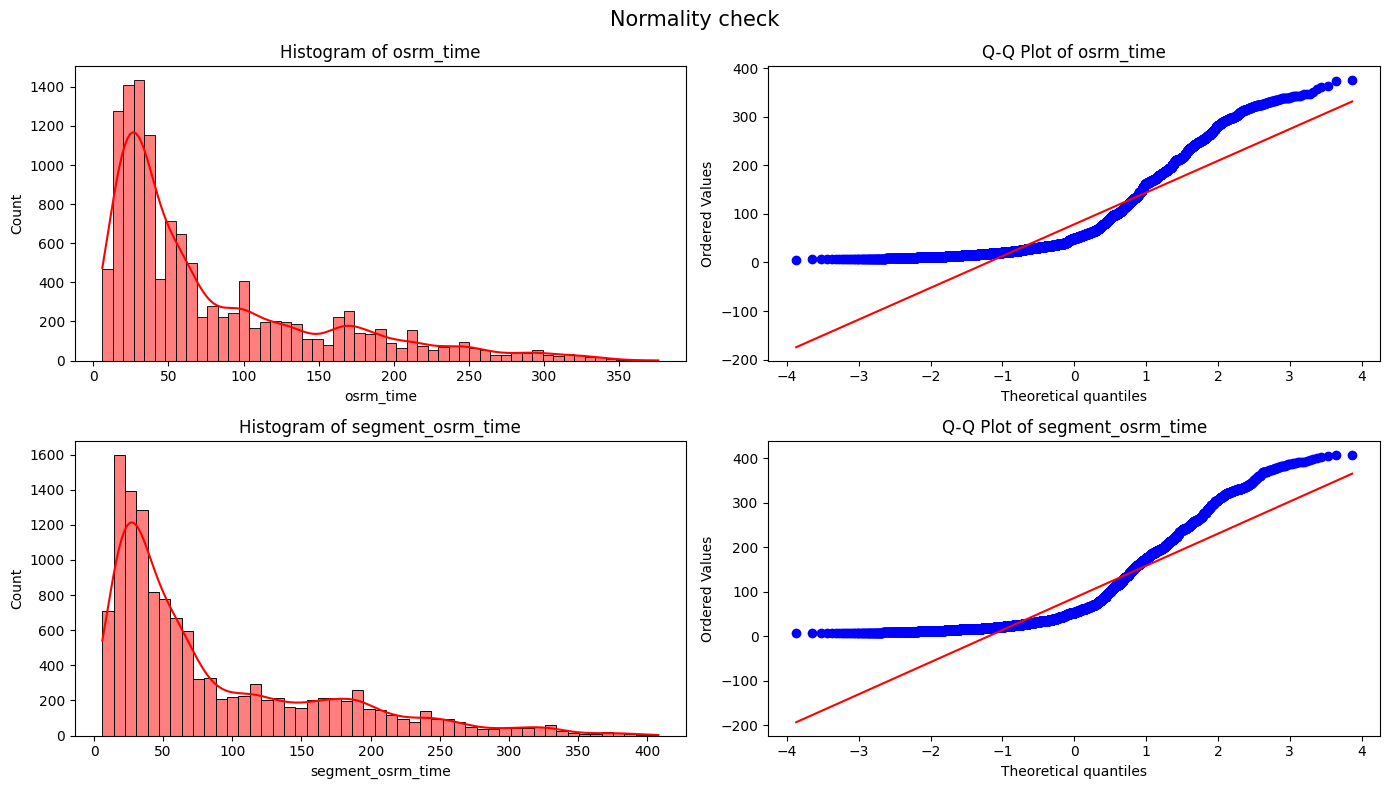

In [ ]:
# 2. Check Assumptions - Normality:
# Normality check by calling normality function
normality(trip_df_iqr, "osrm_time", "segment_osrm_time")

In [ ]:
# Shapiro-Wilk Test by calling shapiro_test function
shapiro_test(trip_df_iqr, 'osrm_time', 'segment_osrm_time')

Shapiro-Wilk Test for osrm_time:
Statistics=0.8150, p-value=0.0000
osrm_time is not Gaussian distribution

Shapiro-Wilk Test for segment_osrm_time:
Statistics=0.8226, p-value=0.0000
segment_osrm_time is not Gaussian distribution



**Equality of Variances:**

In [ ]:
# Levene's test - Equality of Variances:
Levene(trip_df_iqr, 'osrm_time', 'segment_osrm_time')

Levene_stat :  55.96223806557732
p-value :  7.626468531818714e-14
Variances of the two groups are different


**4. Perform the Hypothesis Test**
- Since the data is not Gaussian distribution we can go with non parametric test know as **Wilcoxon signed-rank test** with **Confidence level of 95%**

In [ ]:
# 4. Hypothesis Test
from scipy.stats import wilcoxon

# Formulate Hypotheses
# H0: The mean of osrm_time and segment_osrm_time are equal
# H1: The mean of osrm_time and segment_osrm_time are different

# Choose the significance level
alpha = 0.05

# Perform Wilcoxon signed-rank test
stat, p = wilcoxon(trip_df_iqr['osrm_time'], trip_df_iqr['segment_osrm_time'])
print(f"Wilcoxon signed-rank test:")

if p < alpha:
    print('The mean of osrm_time and segment_osrm_time are different (Reject Null Hypothesis)')
else:
    print('The mean of osrm_time and segment_osrm_time are equal(Failed to Reject Null Hypothesis)')

Wilcoxon signed-rank test:
The mean of osrm_time and segment_osrm_time are different (Reject Null Hypothesis)


**4. Perform the Hypothesis Test**

- Since we have got the result that The mean of osrm_time and segment_osrm_time are different from the above test, we can perform the **Wilcoxon signed-rank test- Left tailed** to check if osrm_time is less than segment_osrm_time with **Confidence level of 95%**

In [ ]:
# 4. Hypothesis Test
from scipy.stats import wilcoxon

# Formulate Hypotheses
# H0: The mean of osrm_time and segment_osrm_time are equal
# H1: The mean of osrm_time is less than segment_osrm_time

# Choose the significance level
alpha = 0.05

# Perform Wilcoxon signed-rank test - LEFT TAILED since the mean of osrm_time < segment_osrm_time
stat, p = wilcoxon(trip_df_iqr['osrm_time'], trip_df_iqr['segment_osrm_time'], alternative='less')
print(f"Wilcoxon signed-rank test:")

if p < alpha:
    print('The mean of osrm_time is less than segment_osrm_time (Reject Null Hypothesis)')
else:
    print('The mean of osrm_time and segment_osrm_time are equal(Failed to Reject Null Hypothesis)')

Wilcoxon signed-rank test:
The mean of osrm_time is less than segment_osrm_time (Reject Null Hypothesis)


**🔍CONCLUSION🔎**

- Based on the Wilcoxon signed-rank test we can conclude that the mean of osrm_time and segment_osrm_time are different.

- Based on the **Wilcoxon signed-rank test- left tailed** we can conclude that **The mean of osrm_time is less than segment_osrm_time.**

# **8. Inference and Recommendations✌**

## <font color="red">**8.1 Segment level Analysis**</font>


<font color="red">**1. Source and Destination States with Highest activity**</font>

- Top 5 Source states with higher activity in terms of logistics operations are **Maharashtra, Karnataka, Tamil Nadu, Haryana, Uttar Pradesh**

- Top 5 Destination states with higher activity in terms of logistics operations are **Karnataka, Maharashtra , Tamil Nadu, Haryana, Uttar Pradesh**

**RECOMMENDATIONS**
- **Use the high activity states as hubs** to expand into neighboring regions or new markets.

- These states are likely critical nodes in the logistics network and **may require more resources, infrastructure, and management focus.**


<font color="red">**2. Source and Destination States with Lowest activity**</font>

- Top 5 Source states with underutilization of logistics operations are **Tripura, Nagaland, Mizoram, Meghalaya, Dadra and Nagar Haveli**

- Top 5 Desination states with underutilization of logistics operations are **Daman & Diu, Nagaland, Tripura, Mizoram, Meghalaya, Dadra and Nagar Haveli**

**RECOMMENDATIONS**

- **Conduct Market Research:** Understand the specific reasons for lower segment counts.

- **Focus on industries with growth potential** that might benefit from enhanced logistics services, such as e-commerce, manufacturing, or agriculture in these states.

<font color="red">**3. Source and Destination Cities with Highest activity**</font>

- Top 5 Source cities with higher activity in terms of logistics operations are **Bangalure, Gurgaon, Mumbai, Bhiwandi and Delhi.**

- Top 5 Destination cities with higher activity in terms of logistics operations are **Mumbai, Bengaluru, Gurgoan, Hyderabad and Bhiwandi.**

**RECOMMENDATIONS**
- Focus on **optimizing logistics operations and infrastructure** in these cities to handle the high volume efficiently.

- **Warehouse Expansion:** Increase warehouse capacity in top source and destination cities to handle the volume more efficiently.

<font color="red">**4. High Traffic Corridors**</font>

- Top 5 corridors experience significantly higher traffic compared to others are **Bangalore_Nelmngla_H (Karnataka) --> Bengaluru_KGAirprt_HB (Karnataka), Bangalore_Nelmngla_H (Karnataka) --> Bengaluru_Bomsndra_HB (Karnataka), Bengaluru_Bomsndra_HB (Karnataka) --> Bengaluru_KGAirprt_HB (Karnataka), Bengaluru_KGAirprt_HB (Karnataka) --> Bangalore_Nelmngla_H (Karnataka) and Pune_Tathawde_H (Maharashtra) --> Bhiwandi_Mankoli_HB (Maharashtra)**

**RECOMMENDATIONS**

- **Upgrade Facilities:** Enhance warehousing and loading/unloading facilities along high-traffic corridors to handle the volume more effectively.

- **Buffer Stock:** Maintain buffer stock at strategic points along these corridors to ensure timely delivery even during peak demand.

## <font color="red">**8.2 Trip level Analysis**</font>


<font color="red">**5. Trip creation activities for hour of the day and day of the week**</font>

-  **Trip creation activities among hour of day** are significantly **high from 4 pm to 6 am** and the trip creation activities are significantly **low from 7 am to 3 pm**.
- **Trip creation activities among day of week** are significantly **high on wednesday and low on Sunday**.

**RECOMMENDATIONS**
- **Resource Allocation:** Allocate more resources (e.g., staff, vehicles) during peak hours to handle the increased workload efficiently.

- Shift Planning: **Implement staggered shifts** to ensure adequate coverage during peak hours while avoiding overstaffing during off-peak times.

- Adjust weekly planning and scheduling to accommodate higher demand especially on Wednesday.

<font color="red">**6. Contribution and average actual distance to destination for FTL and Carting routes**</font>

- The **carting routes contribute a higher percentage when compared with FTL.**
- **Carting routes** contribute **60%** of the data.
- **FTL routes** contribute **40%** of the data.
- Average distance travelled by the **FTL is higher when compared with carting.**
- Average distance travelled by **Carting is 40 Kms**.
- Average distance travelled by **FTL is 351 Kms.**

**RECOMMENDATIONS**
- For FTL routes, ensure that the longest distances are covered efficiently with minimal stops.

- For Carting routes, optimize for multiple short-distance deliveries.

<font color="red">**7. Average delivery time in hours across different route types (FTL vs. Carting)**</font>

- **FTL has the highest average time delivery** of 15 hours when compared to carting of 4 hours.

**RECOMMENDATIONS**

- **Reduce Transit Time:** Identify and mitigate bottlenecks in FTL routes to reduce overall delivery time. This could involve better route planning, reducing idle time, or increasing fleet efficiency.

<font color="red">**8. Average time differences between od_start_time and od_end_time across different states**</font>

- Top 5 states that takes highest time for delivery are **Mizoram, Tripura, Uttarakhand, Himachal Pradesh and Jharkhand.**

**RECOMMENDATIONS**
- **Focus on High Delay States:** Invest in improving logistics infrastructure and processes in the above states with high average delivery times. This could include better route planning, partnerships with local logistics providers, and infrastructure investments.



## <font color="red">**8.3 Hypothesis Testing**</font>

<font color="red">**9. Actual_time aggregated value and OSRM time aggregated value.**</font>

- The mean of **actual_time is greater** than osrm_time.

- Actual delivery times are generally longer than the estimated times provided by the OSRM routing engine, indicating **potential inefficiencies or delays in the delivery process**.


<font color="red">**10. Actual_time aggregated value and segment actual time aggregated value.**</font>

- The mean of **actual_time is greater** than segment_actual_time.
- The total actual time for deliveries is longer than the time taken for individual segments, suggesting that **inefficiencies occur when aggregating multiple segments**

<font color="red">**11. OSRM distance aggregated value and segment OSRM distance aggregated value.**</font>

- The mean of **osrm_distance is less** than segment_osrm_distance.
- The aggregated OSRM distance is shorter than the sum of individual segment distances, **indicating possible inefficiencies in route planning or discrepancies in distance measurement.**

<font color="red">**12. OSRM time aggregated value and segment OSRM time aggregated value.**</font>

- The mean of **osrm_time is less** than segment_osrm_time.
- The total OSRM estimated time is shorter than the sum of individual segment times, which could **highlight inefficiencies in route optimization when considering the entire trip.**

**RECOMMENDATIONS**

-  **Invest in more sophisticated route optimization tools** that take into account real-time traffic data, road conditions, and delivery constraints. This can help narrow the gap between actual delivery times and OSRM estimates, improving overall delivery efficiency and reducing delays.
- Analyze and **optimize the management of individual delivery segments** to ensure smoother transitions and minimize delays
- **Conduct regular performance audits comparing actual times and distances** with OSRM estimates to identify areas of improvement.

**By**

SANKARAN MEENAKSHI SUNDARAM

DSML July 2023